Karen Gong

Partner: Harrison Robel

PHYS 434 AA Lab 7 & Lab 8 

In [110]:
%matplotlib inline
# import library
import pickle
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import statistics
import math
import h5py
import pandas

plt.rcParams["figure.figsize"] = (20,15)

# open the file of interest, and use pickle loading
infile = open ("qcd_100000_pt_250_500.pkl",'rb')
infile2 = open("higgs_100000_pt_250_500.pkl", 'rb')
new_dict = pickle.load(infile)
higgs = pickle.load(infile2)

# list all keys of the files
new_dict.keys()
higgs.keys()

Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')

## Lab 7 - Event selection optimization

In this lab, we are trying to find the best selection of points to optimize signal significance. Choose low-pT (transverse momentum) samples for this lab. In each pT sample, there are dedicated training samples for event selection optimization. All studies should be carried out by normalizing Higgs and QCD samples in each pT sample to given expected yields accordingly (See Dataset descriptions).

1)Make a stacked histogram plot for the feature variable: mass

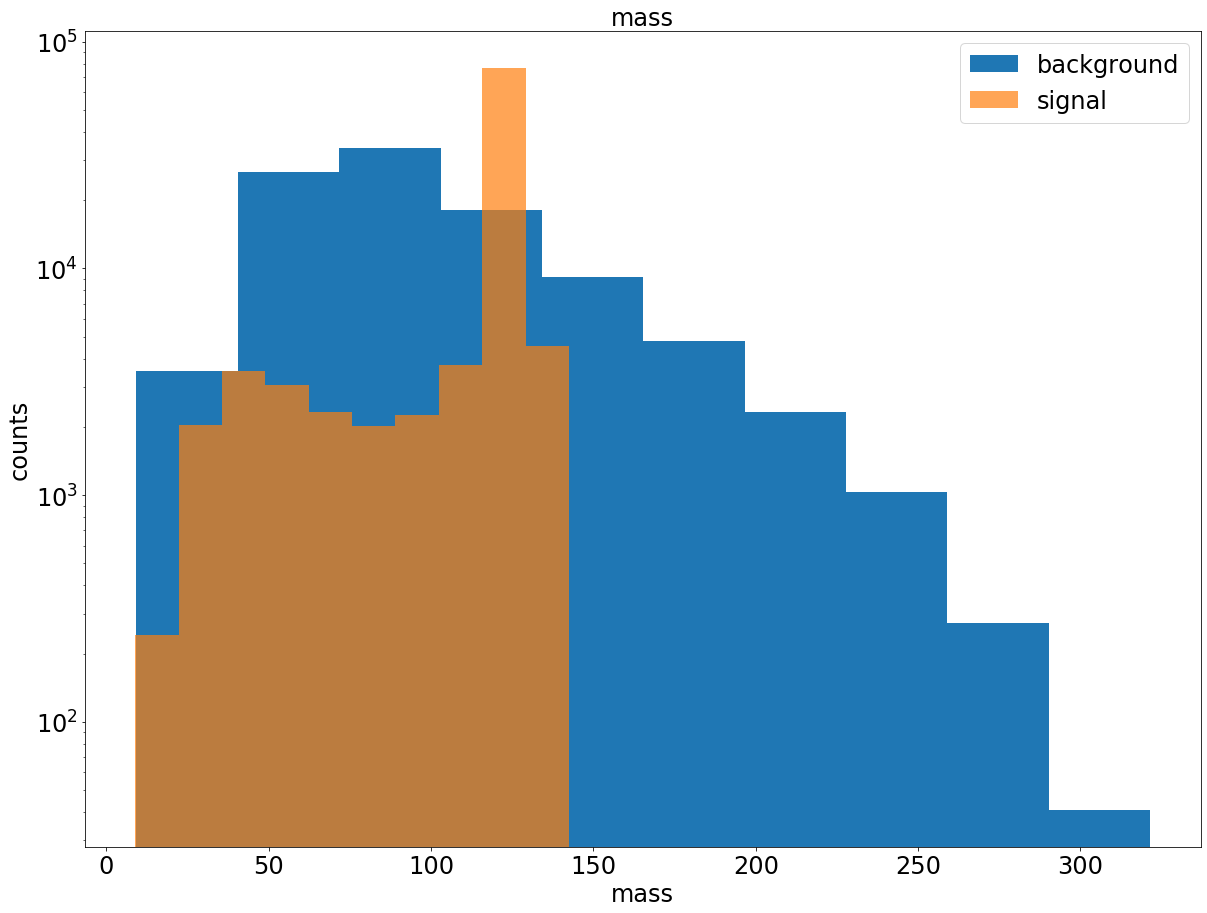

In [63]:
# background vs signal
# this function takes in background data and signal data
# and plots them on a histogram on top of each other
def bgsig(bg, sig, title, xaxis):
    plt.hist(bg, label = 'background')
    plt.hist(sig, alpha = 0.7, label = 'signal')
    plt.title(title, fontsize = 24)
    plt.tick_params(labelsize = 24)
    plt.yscale('log')
    plt.xlabel(xaxis, fontsize = 24)
    plt.ylabel("counts", fontsize = 24)
    plt.legend(fontsize = 24)
    plt.show()
    
bgmass = np.array(new_dict.get('mass'))
mass = np.array(higgs.get('mass'))

bgsig(bgmass, mass, 'mass', 'mass')

* Evaluate expected significance without any event selection. 
    * Use Poisson statistics for significance calculation. 
    * Compare your number of  ${N_{Higgs}/\sqrt(N_{QCD})}$ . If they are equivalent, explain your findings.

In [64]:
signal = 100
qcd = 20000

prob = stats.poisson.cdf(qcd + signal, qcd)

# my yield
sigma = stats.norm.ppf(prob)
print("My expected significance:", sigma)

# expected yield
exp_yield = signal / math.sqrt(qcd)
print("The expected yield:      ", exp_yield)

My expected significance: 0.7112259282313185
The expected yield:       0.7071067811865475


Yes, they are pretty much equivalent. This means that without any event selection (cuts to the data), the expected significance is low. 

2)Identify mass cuts to optimize the expected significance.
* Try different mass cuts systematically
* Evaluate expected significance for each set of mass cuts
* Identify the set of the mass cuts which give you the highest significance.

First cut expected significance: 0.7609815832901626


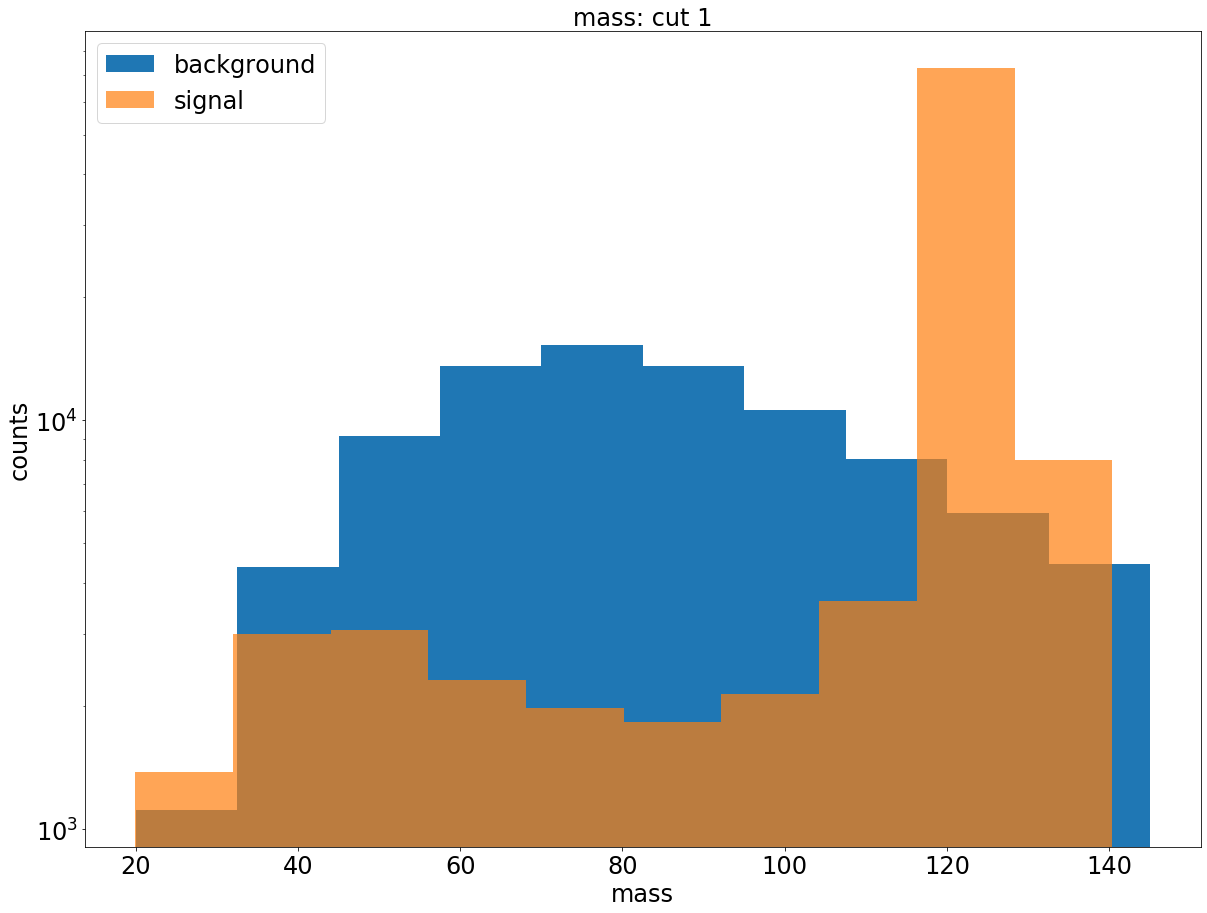

In [133]:
signal = 100
qcd = 20000
total = 100000

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

s_bgmass = sorted(np.array(new_dict.get('mass')))
s_mass = sorted(np.array(higgs.get('mass')))

cutbg = find_nearest(s_bgmass, 145)
cutbg2 = find_nearest(s_bgmass, 20)
cutsig = find_nearest(s_mass, 145)
cutsig2 = find_nearest(s_mass, 20)

newbg = s_bgmass[cutbg2:cutbg]
newsig = s_mass[cutsig2:cutsig]

percent1bg = qcd * (len(newbg) / total) 
percent1sig = signal * (len(newsig) / total)

sigma = percent1sig / math.sqrt(percent1bg) 
print("First cut expected significance:", sigma)

bgsig(newbg, newsig, 'mass: cut 1', 'mass')

Second cut expected significance: 2.05787145252523


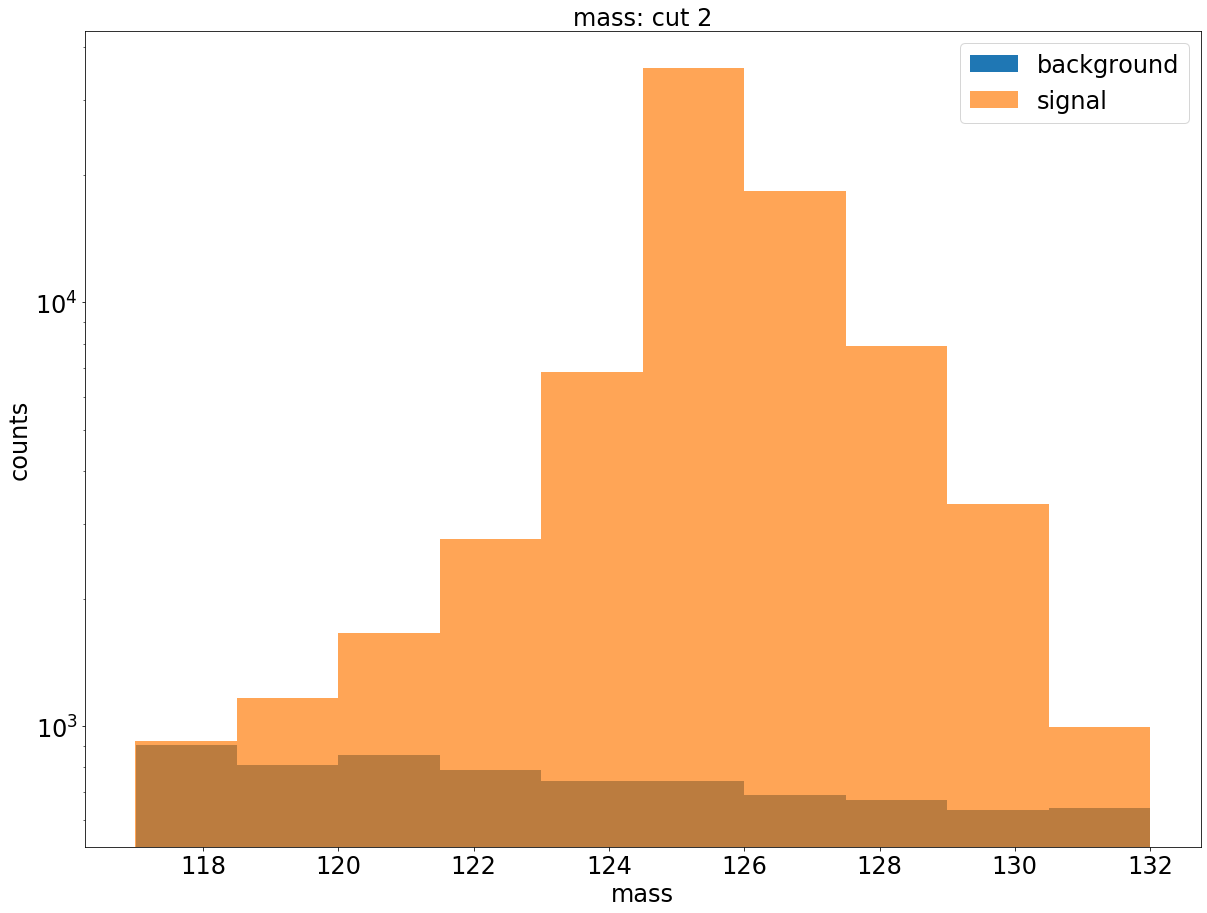

In [66]:
cutbg = find_nearest(s_bgmass, 132)
cutsig = find_nearest(s_mass, 132)

cutbg2 = find_nearest(s_bgmass, 117)
cutsig2 = find_nearest(s_mass, 117)

newbg = s_bgmass[cutbg2:cutbg]
newsig = s_mass[cutsig2:cutsig]

percent1bg = qcd * (len(newbg) / total) 
percent1sig = signal * (len(newsig) / total)

sigma = percent1sig / math.sqrt(percent1bg) 
print("Second cut expected significance:", sigma)

bgsig(newbg, newsig, 'mass: cut 2', 'mass')

Third cut expected significance: 3.1715516264763854


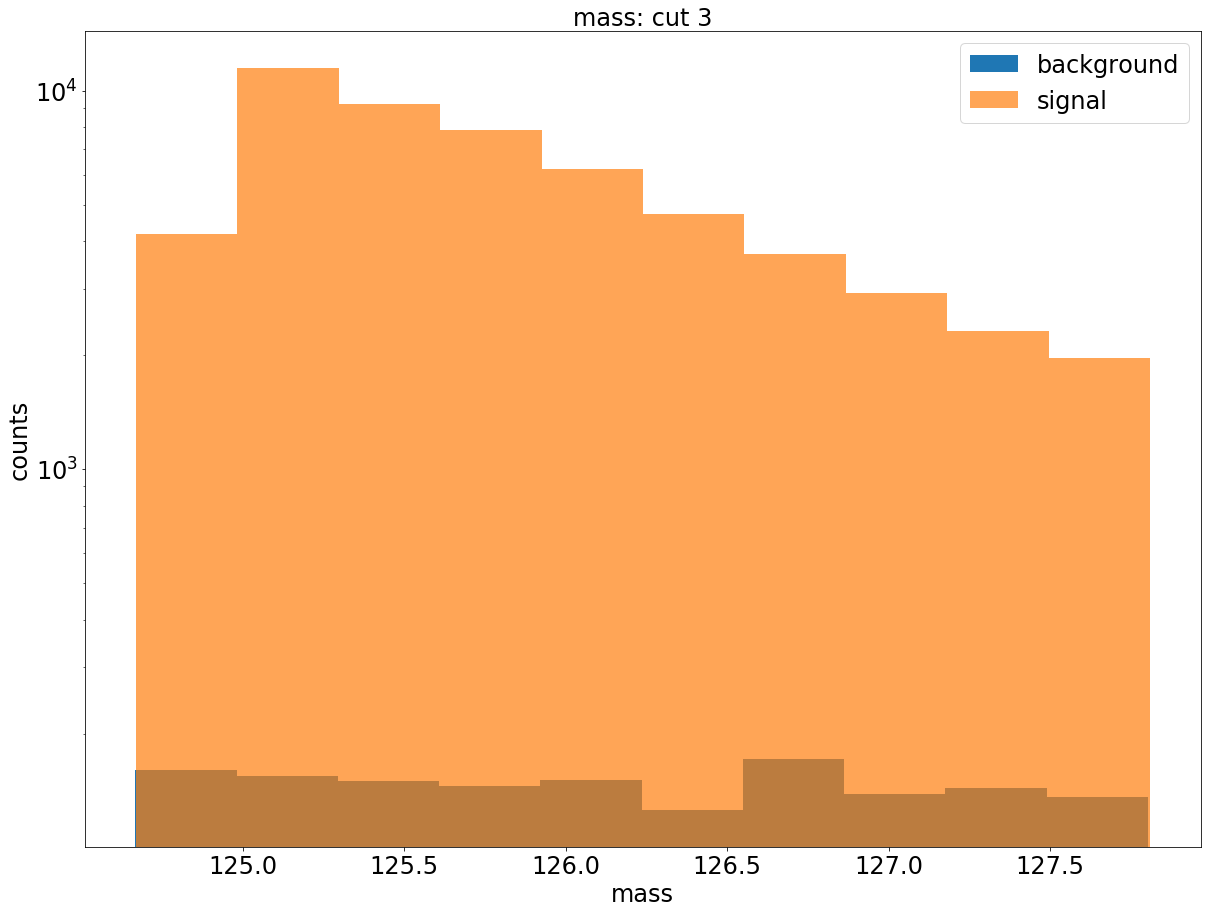

In [67]:
cutbg = find_nearest(s_bgmass, 127.81)
cutsig = find_nearest(s_mass, 127.81)

cutbg2 = find_nearest(s_bgmass, 124.67)
cutsig2 = find_nearest(s_mass, 124.67)

newbg = s_bgmass[cutbg2:cutbg]
newsig = s_mass[cutsig2:cutsig]

percent1bg = qcd * (len(newbg) / total) 
percent1sig = signal * (len(newsig) / total)

sigma = percent1sig / math.sqrt(percent1bg) 
print("Third cut expected significance:", sigma)

bgsig(newbg, newsig, 'mass: cut 3', 'mass')

3)Make stacked histogram plots for the rest of features

* Set A of plots without any event selection
    * Can you identify another feature as discriminative as mass feature (i.e. equal or better significance after feature cut)
* Set B of plots with your optimal mass cuts
    * Can you identify additional feature to further improve expected significance?

In [68]:
# background data
bgpt = np.array(new_dict.get('pt'))
bgeta = np.array(new_dict.get('eta'))
bgphi = np.array(new_dict.get('phi'))
bgmass = np.array(new_dict.get('mass'))
bgee2 = np.array(new_dict.get('ee2'))
bgee3 = np.array(new_dict.get('ee3'))
bgd2 = np.array(new_dict.get('d2'))
bgangularity = np.array(new_dict.get('angularity'))
bgt1 = np.array(new_dict.get('t1'))
bgt2 = np.array(new_dict.get('t2'))
bgt3 = np.array(new_dict.get('t3'))
bgt21 = np.array(new_dict.get('t21'))
bgt32 = np.array(new_dict.get('t32'))
bgKtDeltaR = np.array(new_dict.get('KtDeltaR'))

# signal data
pt = np.array(higgs.get('pt'))
eta = np.array(higgs.get('eta'))
phi = np.array(higgs.get('phi'))
mass = np.array(higgs.get('mass'))
ee2 = np.array(higgs.get('ee2'))
ee3 = np.array(higgs.get('ee3'))
d2 = np.array(higgs.get('d2'))
angularity = np.array(higgs.get('angularity'))
t1 = np.array(higgs.get('t1'))
t2 = np.array(higgs.get('t2'))
t3 = np.array(higgs.get('t3'))
t21 = np.array(higgs.get('t21'))
t32 = np.array(higgs.get('t32'))
KtDeltaR = np.array(higgs.get('KtDeltaR'))

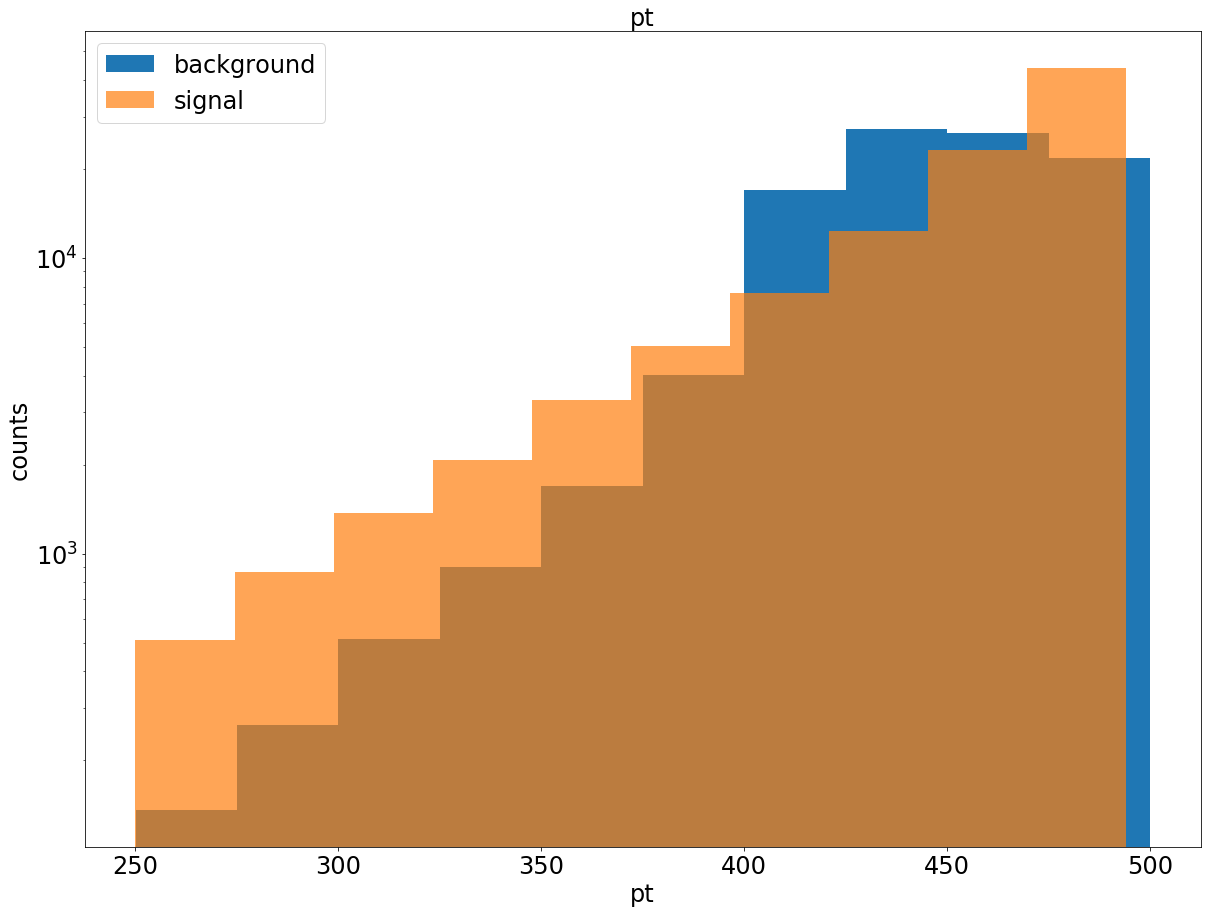

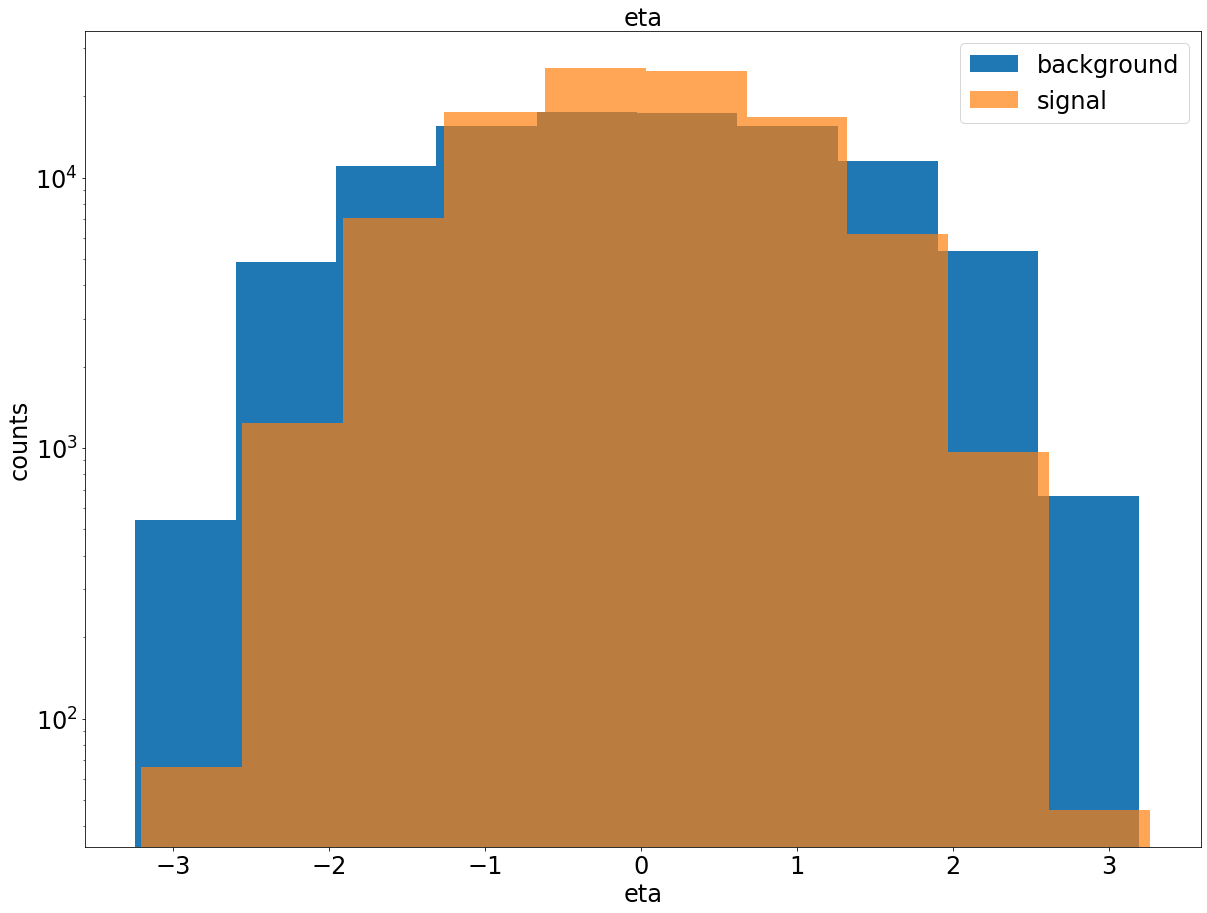

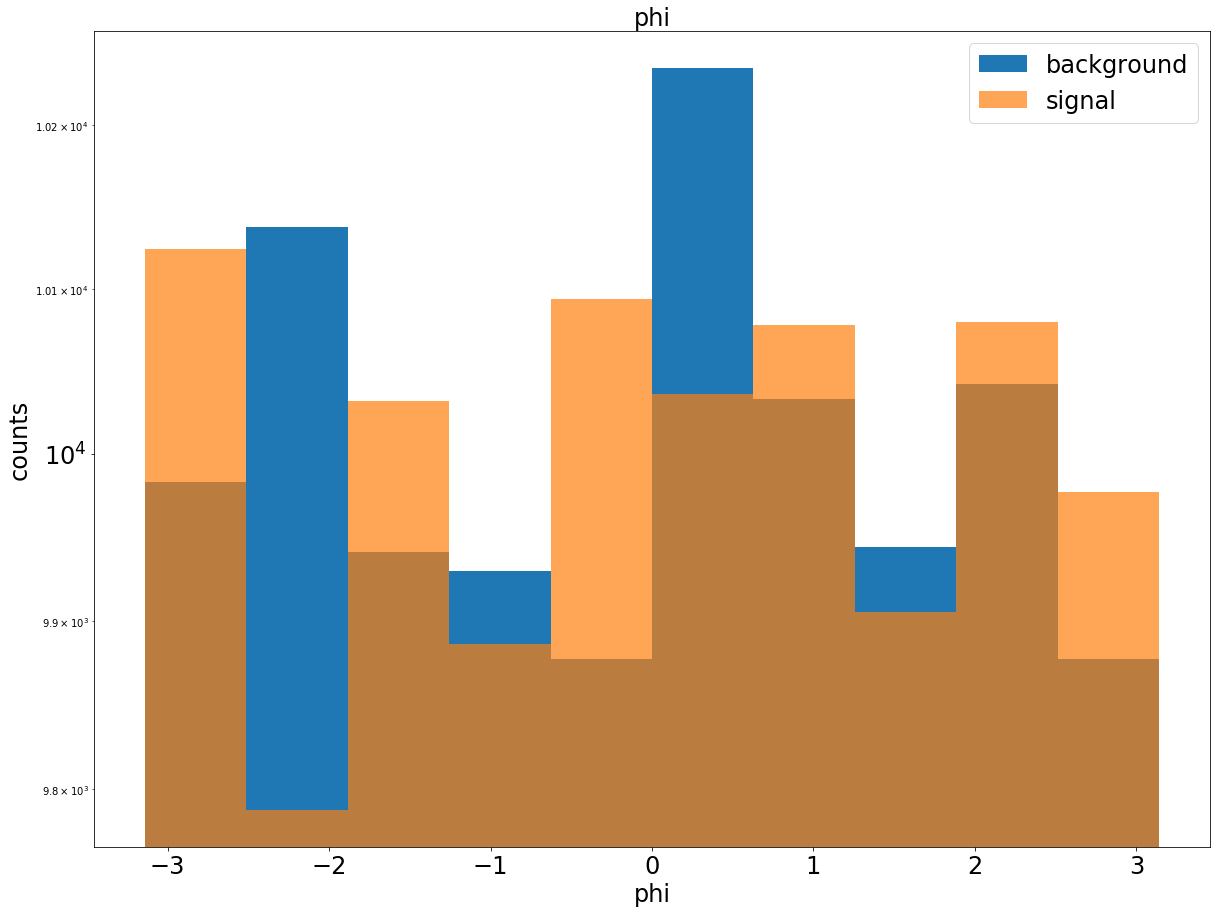

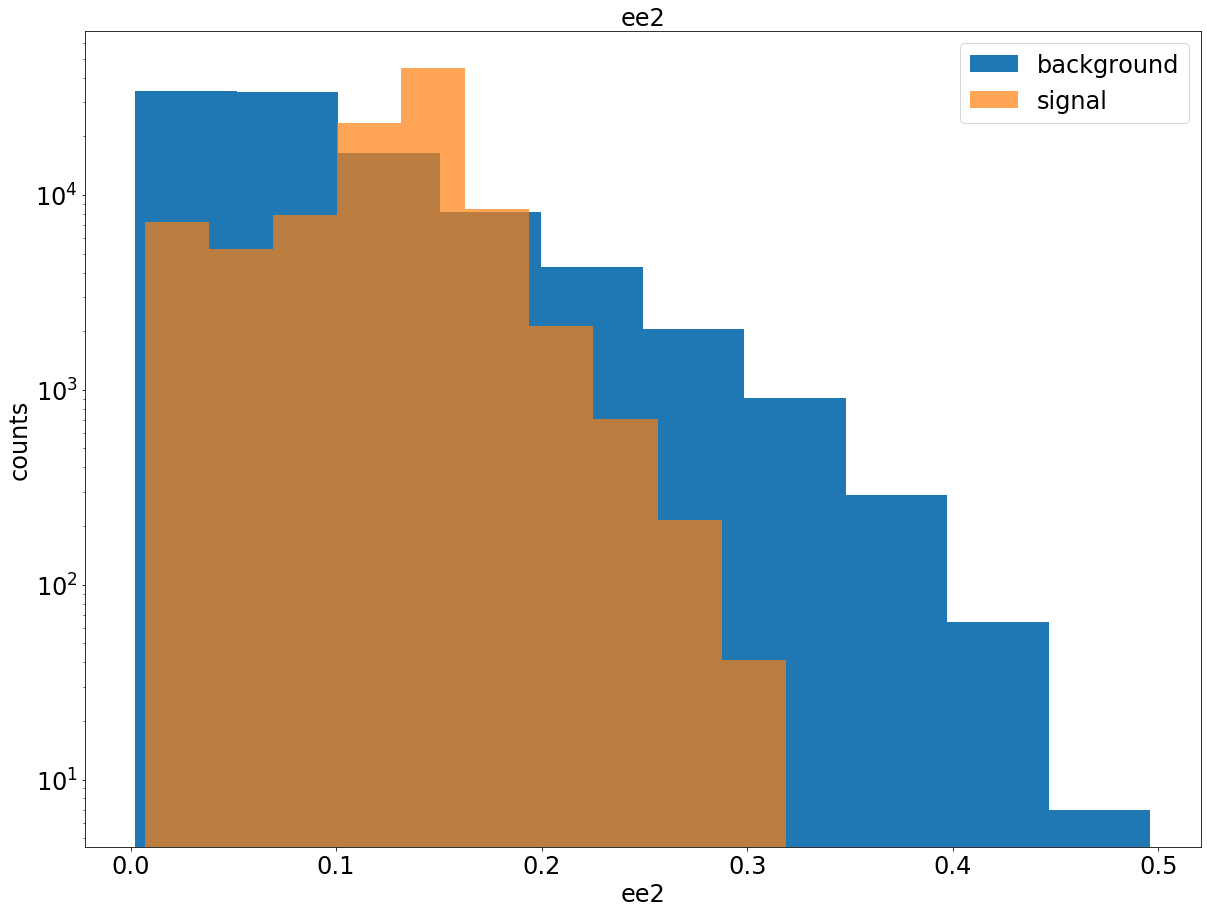

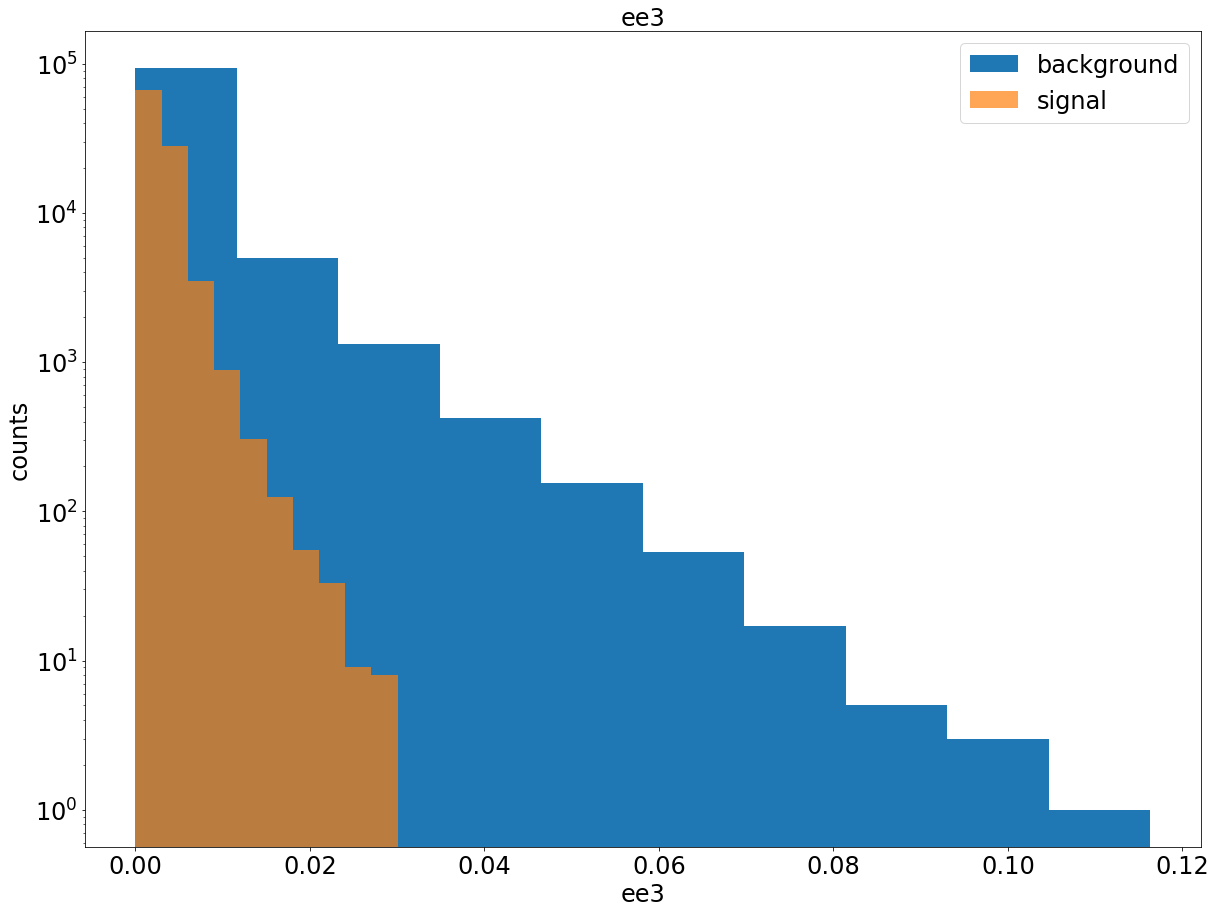

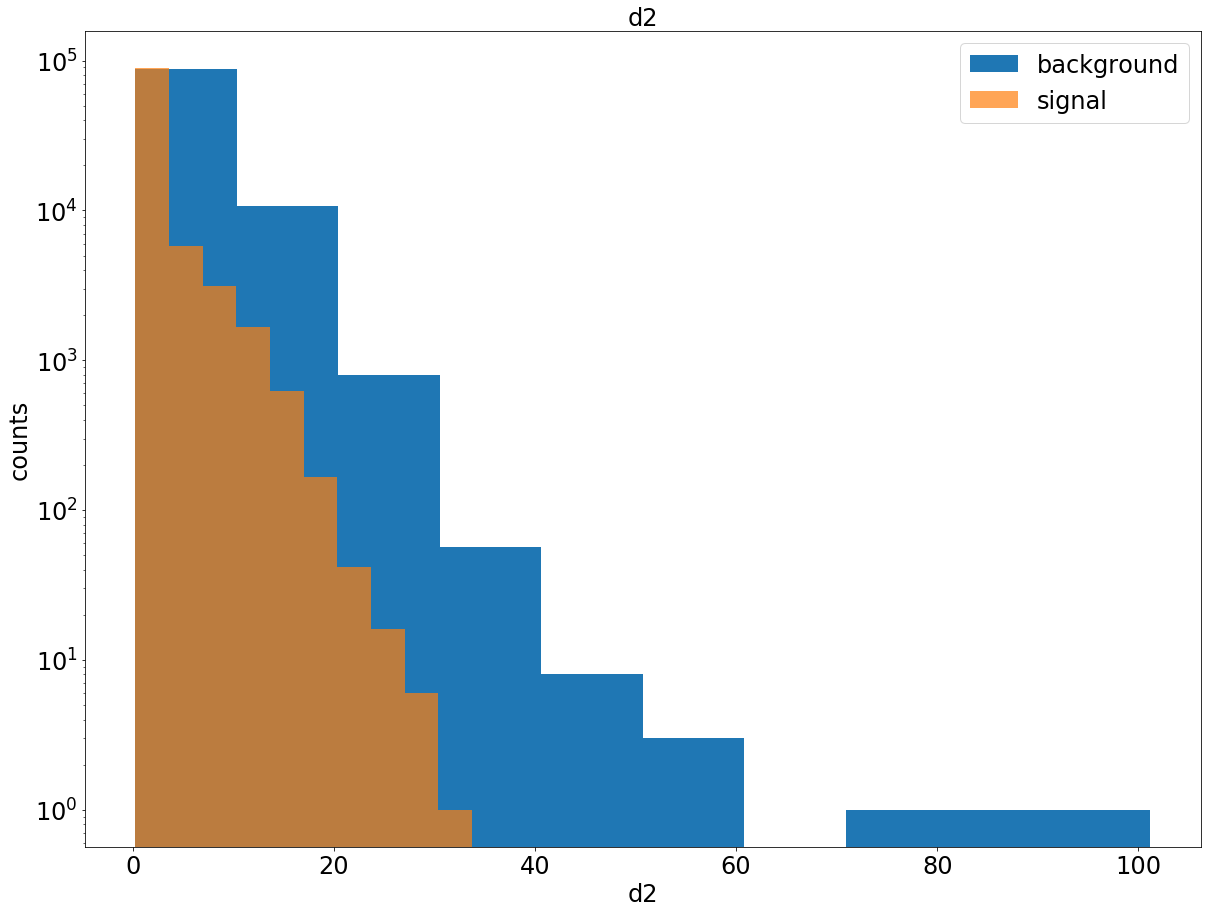

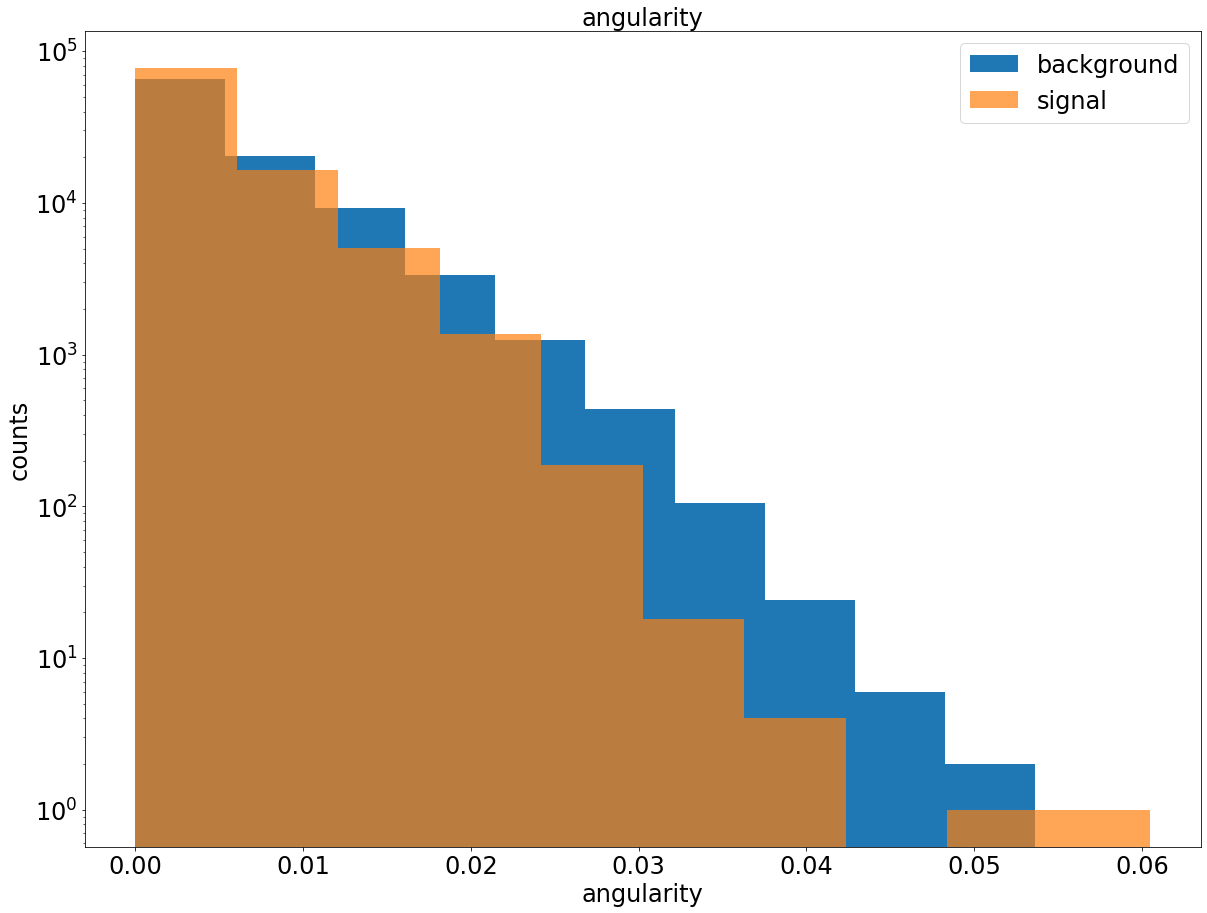

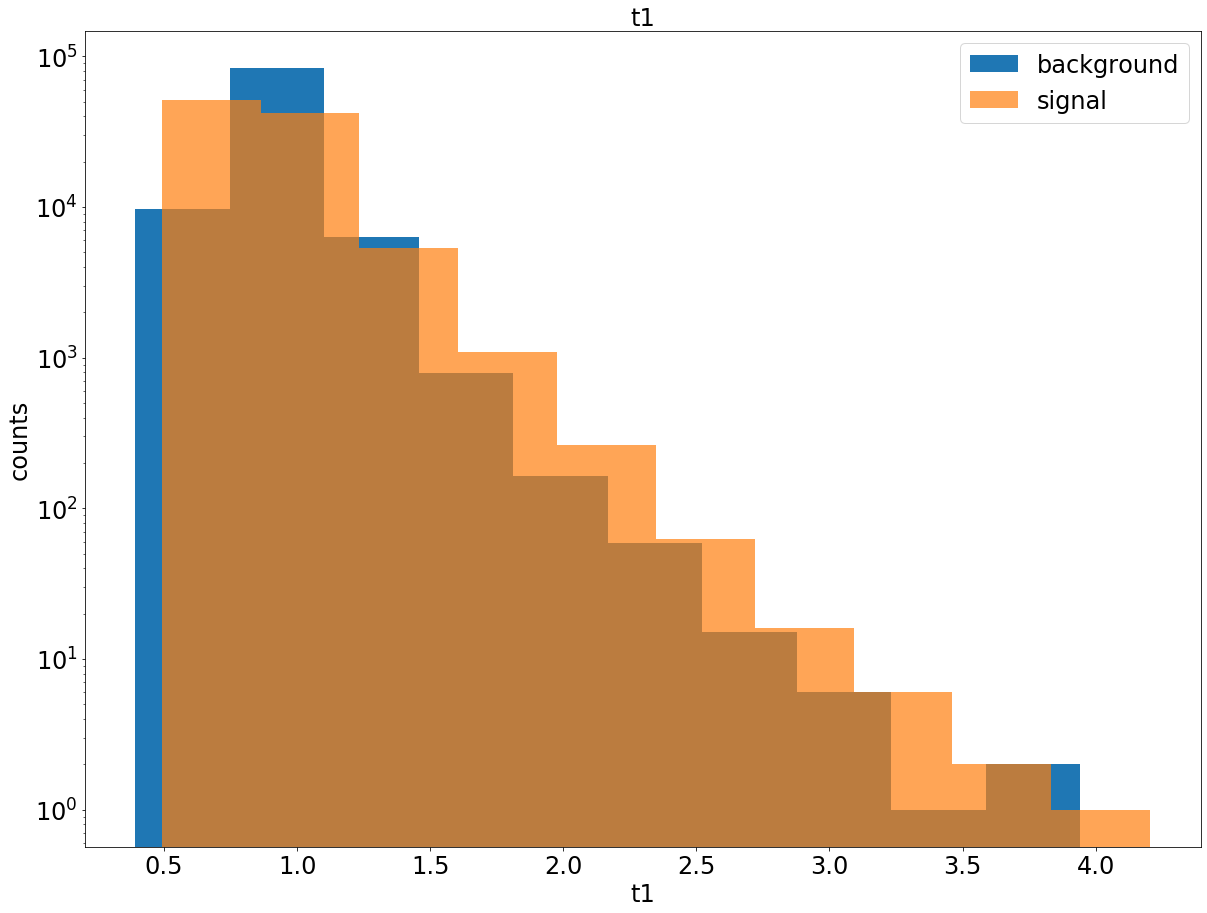

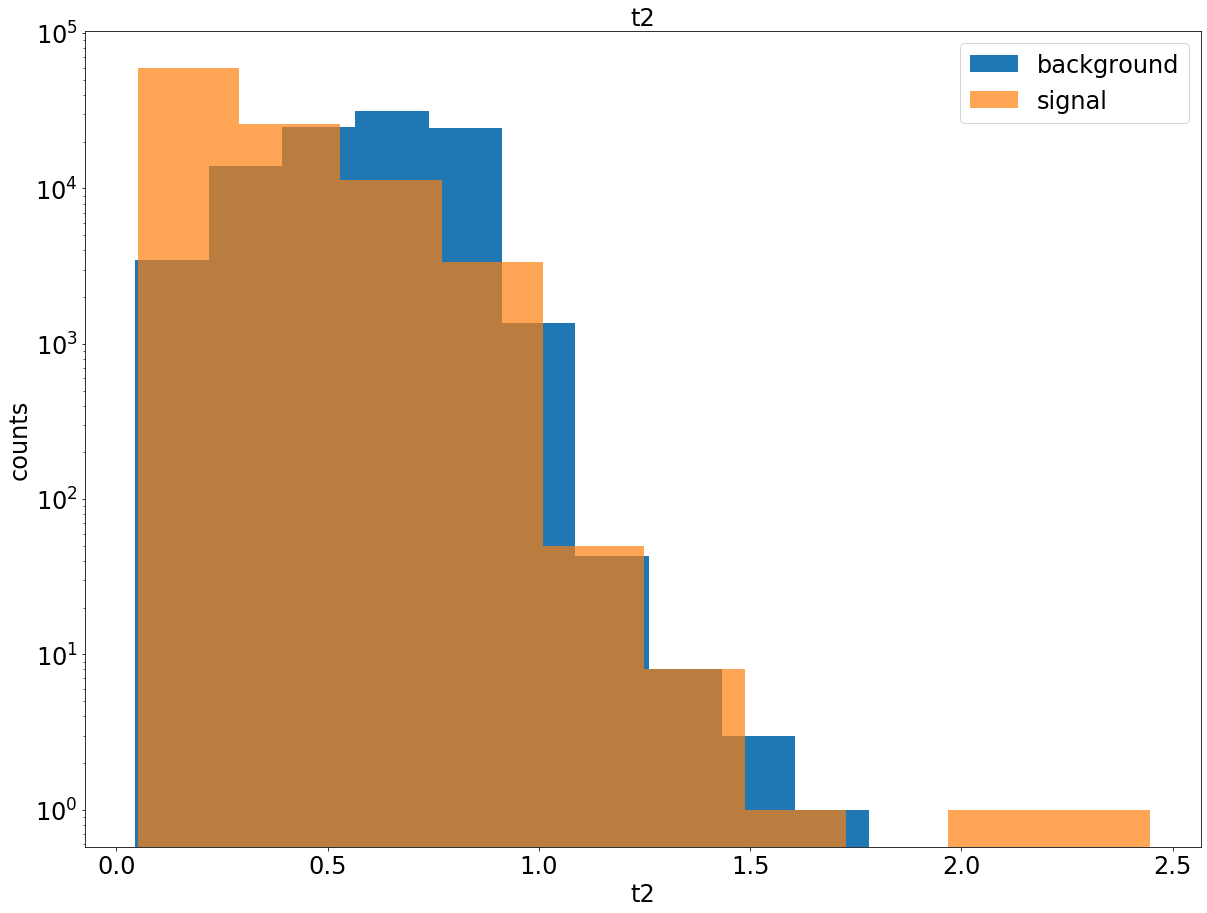

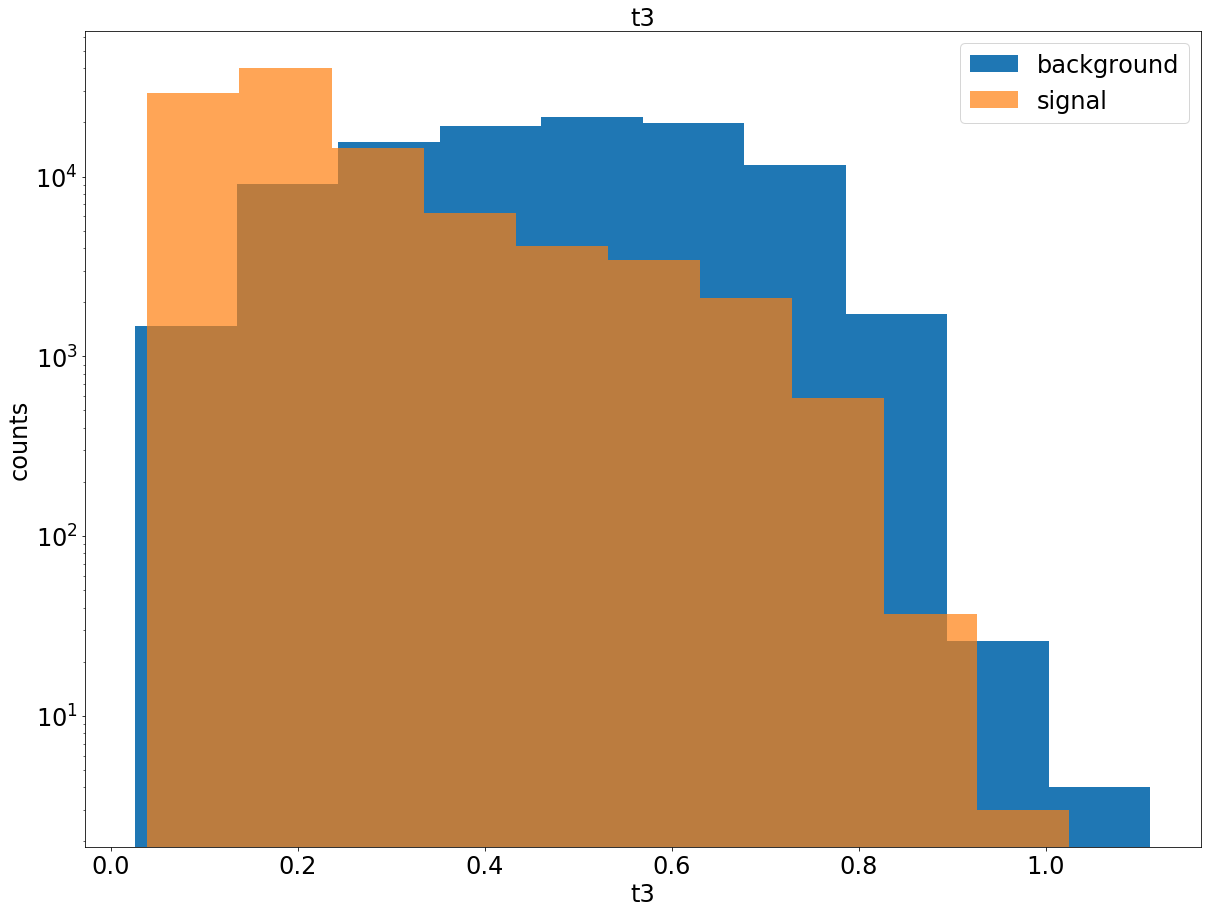

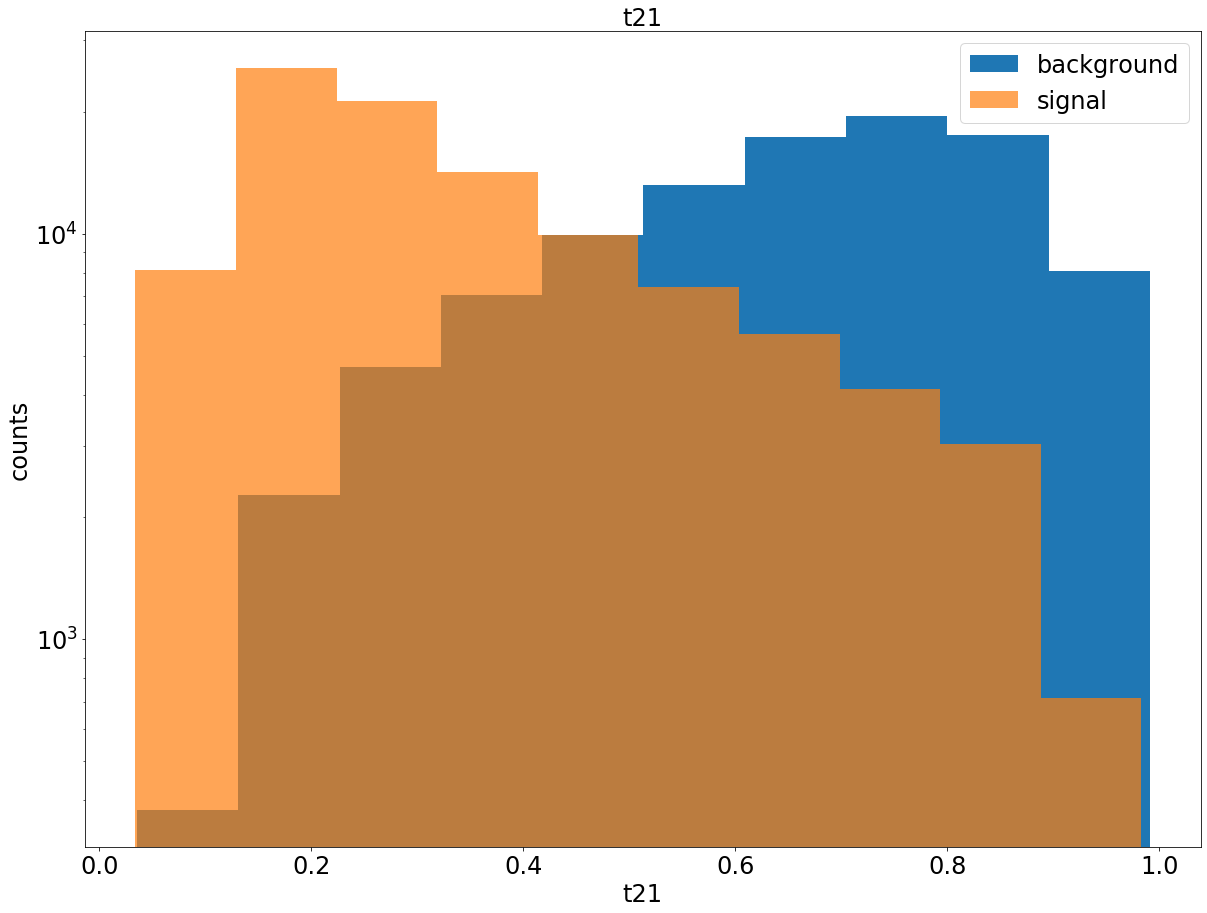

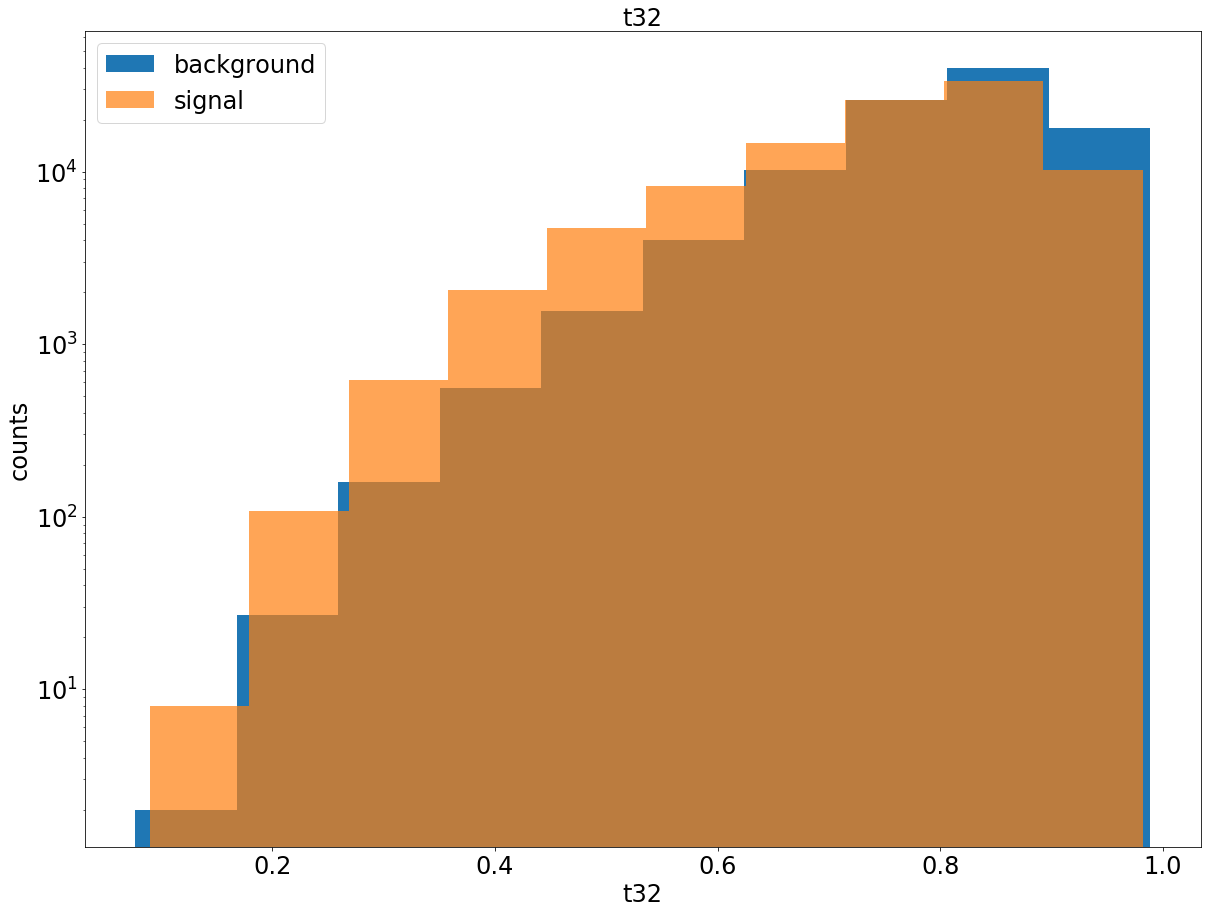

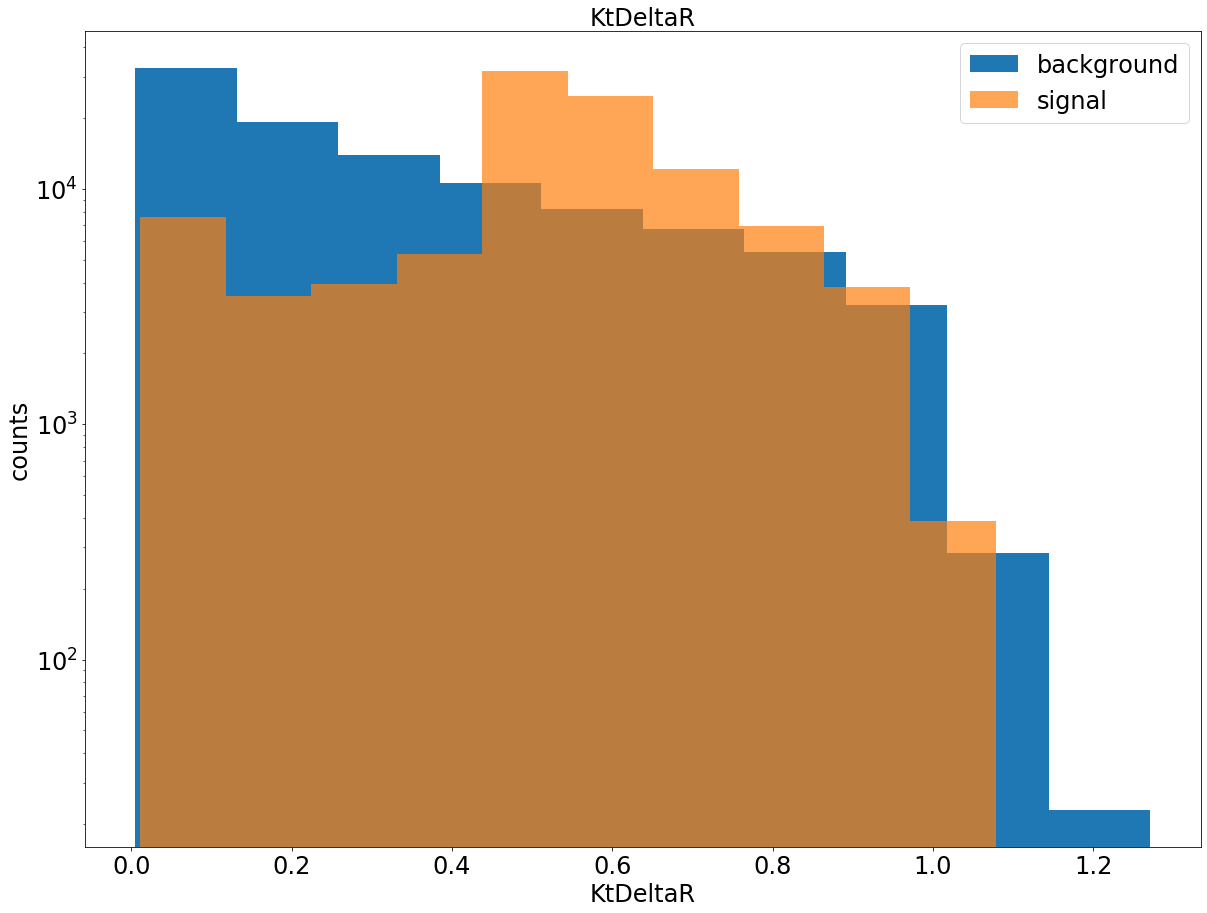

In [69]:
#Set A of plots with no selections

bgsig(bgpt, pt, "pt", "pt")
bgsig(bgeta, eta, "eta","eta")
bgsig(bgphi, phi, "phi","phi" )
bgsig(bgee2, ee2, "ee2", "ee2")
bgsig(bgee3, ee3, "ee3","ee3")
bgsig(bgd2, d2, "d2","d2")
bgsig(bgangularity, angularity, "angularity","angularity")
bgsig(bgt1, t1, "t1","t1")
bgsig(bgt2, t2, "t2","t2")
bgsig(bgt3, t3, "t3","t3")
bgsig(bgt21, t21, "t21","t21")
bgsig(bgt32, t32, "t32","t32")
bgsig(bgKtDeltaR, KtDeltaR, "KtDeltaR","KtDeltaR")

The features 't3' and 't21' is as disciminative as the mass feature, because there is a large spike of the signal that is not overlapped by the background. 

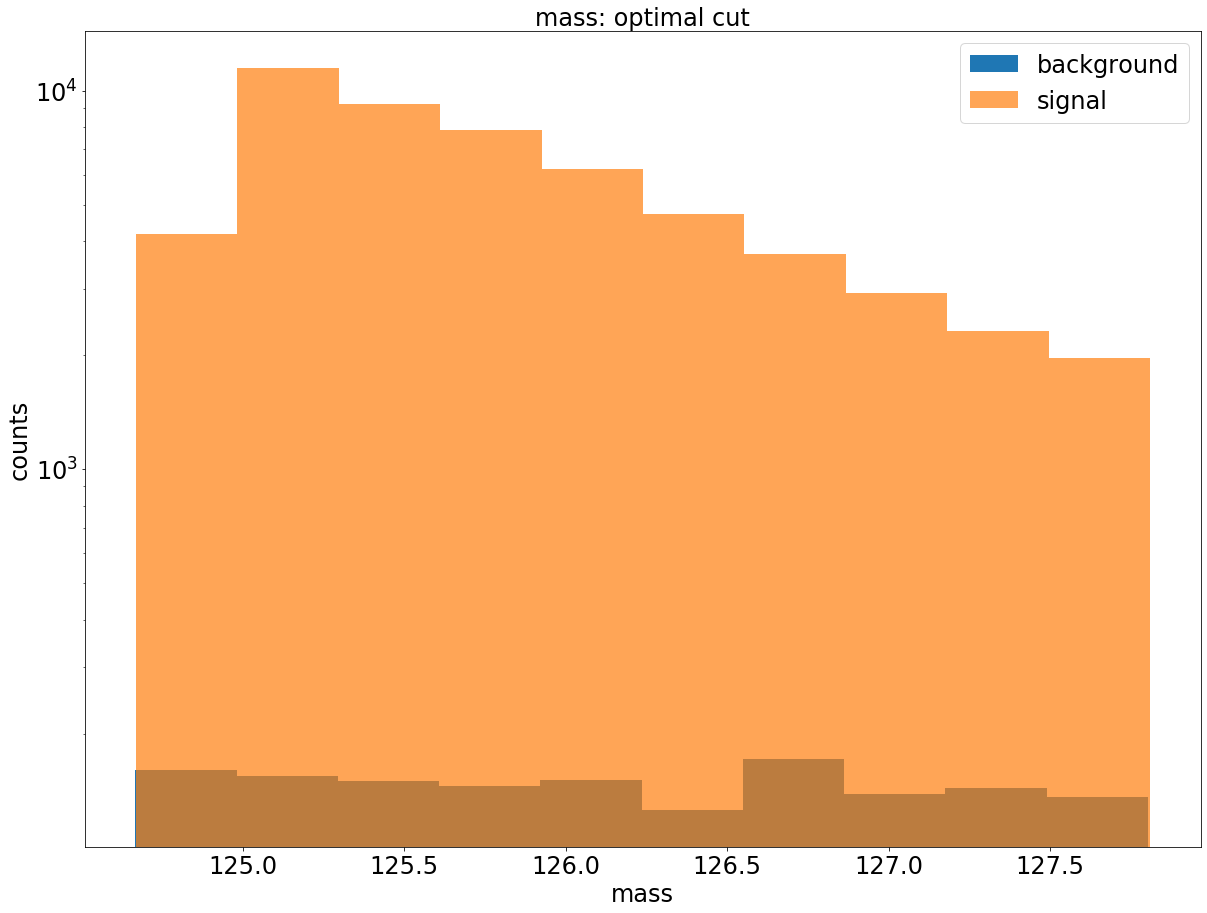

In [77]:
# Set B optimal mass cuts

cutbg = find_nearest(s_bgmass, 127.81)
cutsig = find_nearest(s_mass, 127.81)

cutbg2 = find_nearest(s_bgmass, 124.67)
cutsig2 = find_nearest(s_mass, 124.67)

newmassbg = s_bgmass[cutbg2:cutbg]
newmasssig = s_mass[cutsig2:cutsig]

bgsig(newmassbg, newmasssig, 'mass: optimal cut', 'mass')

There is not much more to improve for mass cuts. Any more cuts and the significance starts to decrease.

4)Optimize event selections using multiple features (if necessary)
* Find a set of feature cuts which can help you to achieve the best significance.
* Compare significance (before/after event selection) derived in your pT samples to your lab partner. Describe your findings.

Before event selection significance: 0.7071067811865475
After event selection significance:  0.7609815832901626


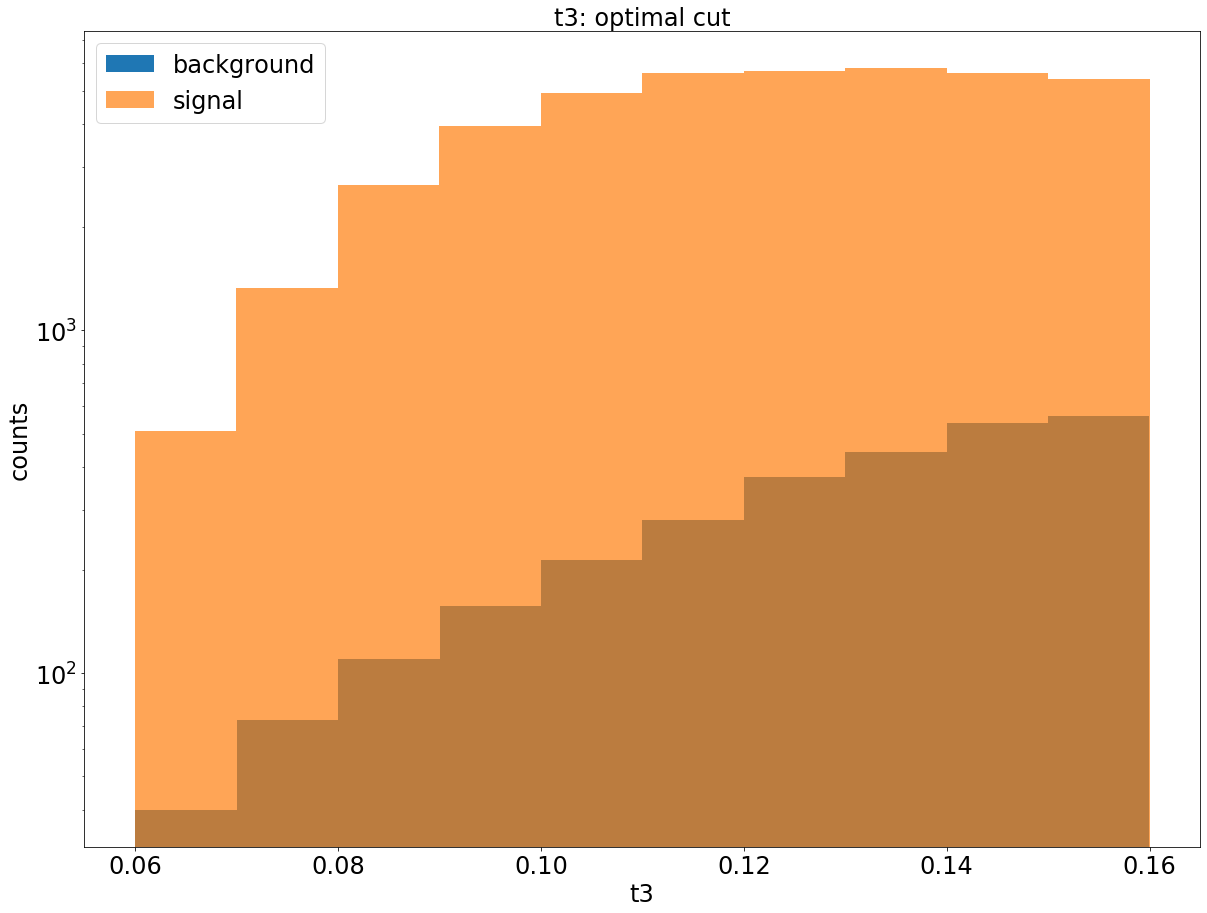

In [190]:
signal = 100
qcd = 20000
total = 100000

s_bgt3 = sorted(np.array(new_dict.get('t3')))
s_t3 = sorted(np.array(higgs.get('t3')))

cutbg = find_nearest(s_bgt3, 0.16)
cutsig = find_nearest(s_t3, 0.16)

cutbg2 = find_nearest(s_bgt3, 0.06)
cutsig2 = find_nearest(s_t3, 0.06)

newt3bg = s_bgt3[cutbg2:cutbg]
newt3sig = s_t3[cutsig2:cutsig]

# Before event selection significance
exp_yield = signal / math.sqrt(qcd)
print("Before event selection significance:", exp_yield)

percent1bg = qcd * (len(newbg) / total) 
percent1sig = signal * (len(newsig) / total)

sigma = percent1sig / math.sqrt(percent1bg) 
print("After event selection significance: ", sigma)

bgsig(newt3bg, newt3sig, 't3: optimal cut', "t3")

Before event selection significance: 0.7071067811865475
After event selection significance:  1.757253376125739


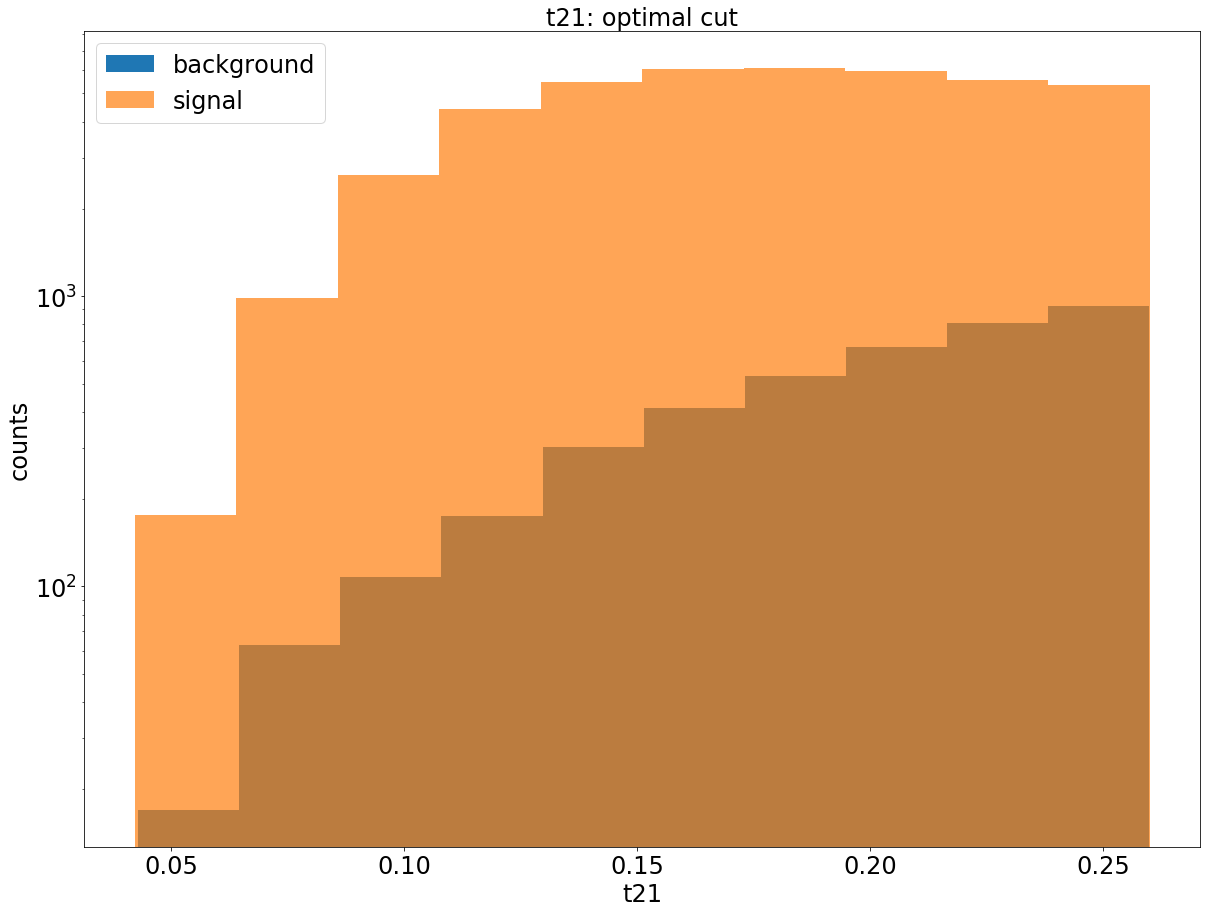

In [204]:
signal = 100
qcd = 20000
total = 100000

s_bgt21 = sorted(np.array(new_dict.get('t21')))
s_t21 = sorted(np.array(higgs.get('t21')))

cutbg = find_nearest(s_bgt21, 0.26)
cutsig = find_nearest(s_t21, 0.26)

cutbg2 = find_nearest(s_bgt21, 0.04)
cutsig2 = find_nearest(s_t21, 0.04)

newt21bg = s_bgt21[cutbg2:cutbg]
newt21sig = s_t21[cutsig2:cutsig]

# Before event selection significance
exp_yield = signal / math.sqrt(qcd)
print("Before event selection significance:", exp_yield)

percent1bg = qcd * (len(newbg) / total) 
percent1sig = signal * (len(newsig) / total)

sigma = percent1sig / math.sqrt(percent1bg) 
print("After event selection significance: ", sigma)

bgsig(newt21bg, newt21sig, 't21: optimal cut', 't21')

For all three features -- mass, t3, and t21 -- the significance improved after cutting the data. 

## Lab 8 - Psuedo-experiment data analysis

In [73]:
# open the file of interest
high = pandas.DataFrame.to_numpy(pandas.read_hdf('data_highLumi_pt_250_500.h5'))
low = pandas.DataFrame.to_numpy(pandas.read_hdf('data_lowLumi_pt_250_500.h5'))

1)High luminosity data
* Focus on each feature of your event selection.
* Plot observed data, overlap with expected signal and background (normalized to observed yields) without event selection.
* Plot observed data, overlap with expected signal and background (normalized to observed yields) with optimal event selection.
* Evaluate observed significance and compare your results to expectation


In [171]:
highmass = sorted(high[:,3])
hight3 = sorted(high[:,10])
hight21 = sorted(high[:,11])

In [201]:
def histo(bg, sig, lumi, title, xaxis):
    plt.hist(bg, label = 'background')                          # expected mass background
    plt.hist(sig, alpha = 0.8, label = 'signal')                # expected mass signal
    plt.hist(lumi, alpha = 0.4, label = 'high luminosity') #observed mass data
    plt.title(title, fontsize = 24)
    plt.tick_params(labelsize = 24)
    plt.yscale('log')
    plt.xlabel(xaxis, fontsize = 24)
    plt.ylabel("counts", fontsize = 24)
    plt.legend(fontsize = 24)
    plt.show()
    
def norm(array):
    norm = np.linalg.norm(array)
    normal_array = array / norm
    return normal_array

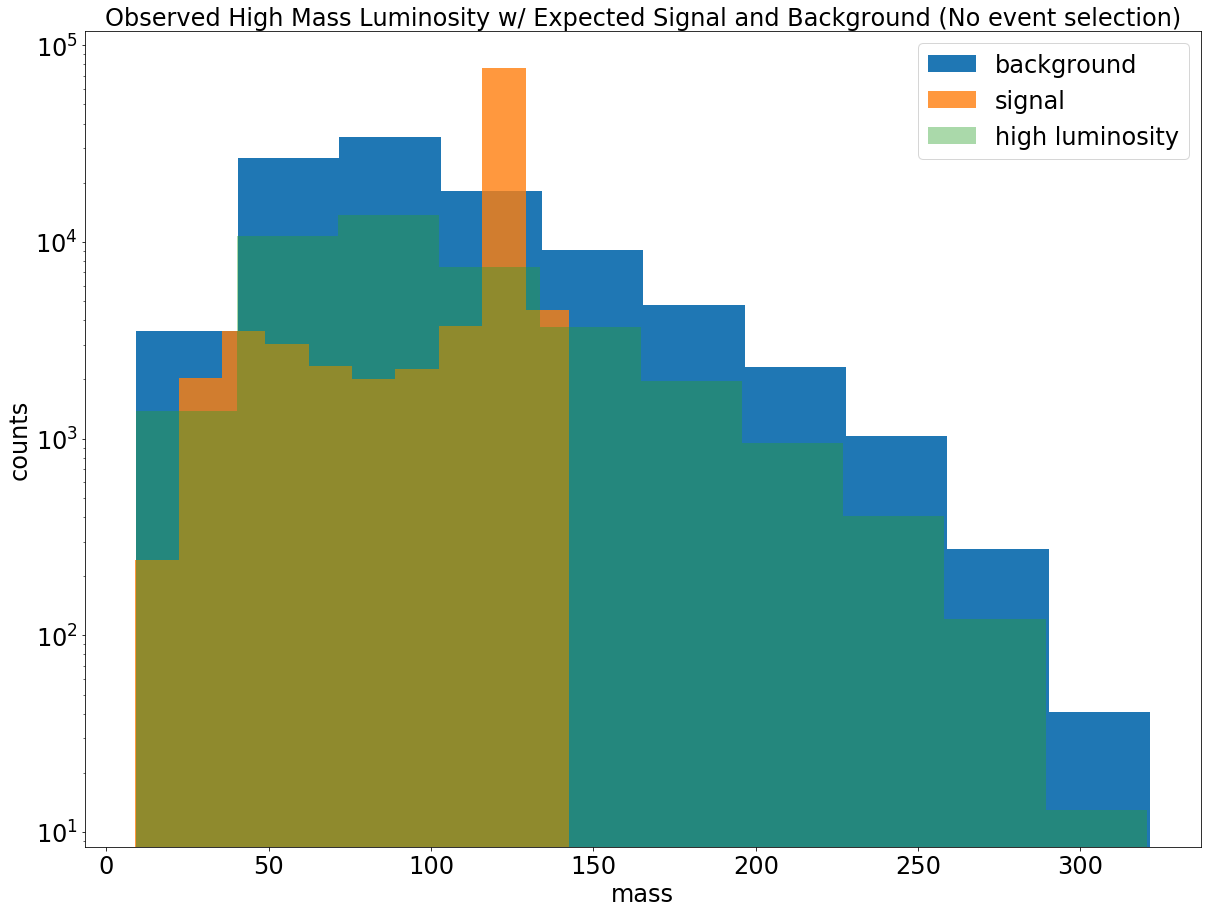

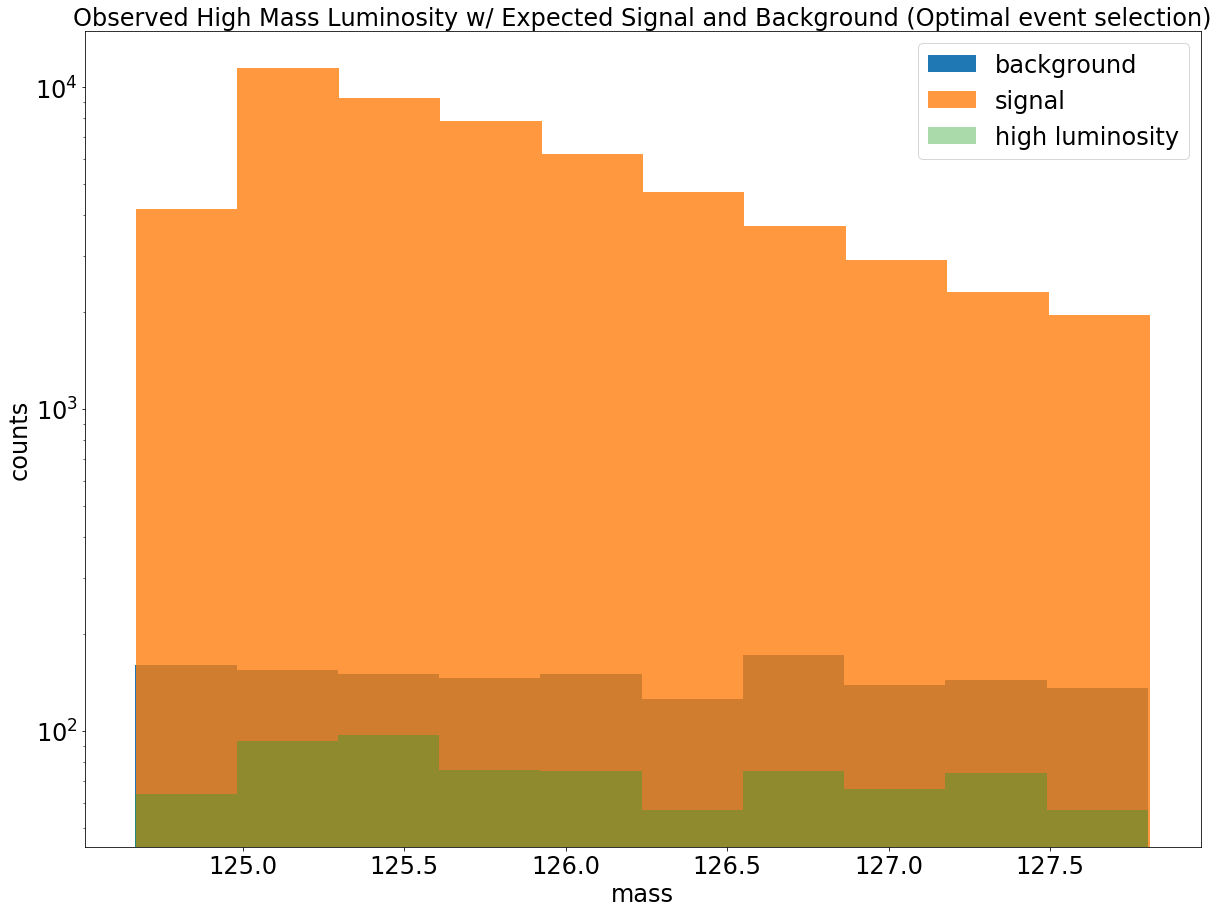

In [217]:
# MASS

# no event selection
histo(bgmass, mass, highmass, "Observed High Mass Luminosity w/ Expected Signal and Background (No event selection)", "mass")

# optimal event selection
cutbg = find_nearest(s_bgmass, 127.81)
cutsig = find_nearest(s_mass, 127.81)
cuthigh = find_nearest(highmass, 127.81)

cutbg2 = find_nearest(s_bgmass, 124.67)
cutsig2 = find_nearest(s_mass, 124.67)
cuthigh2 = find_nearest(highmass, 124.67)

newbg = s_bgmass[cutbg2:cutbg]
newsig = s_mass[cutsig2:cutsig]
newhigh = highmass[cuthigh2:cuthigh]

histo(newbg, newsig, newhigh, "Observed High Mass Luminosity w/ Expected Signal and Background (Optimal event selection)", "mass")

# observed significance

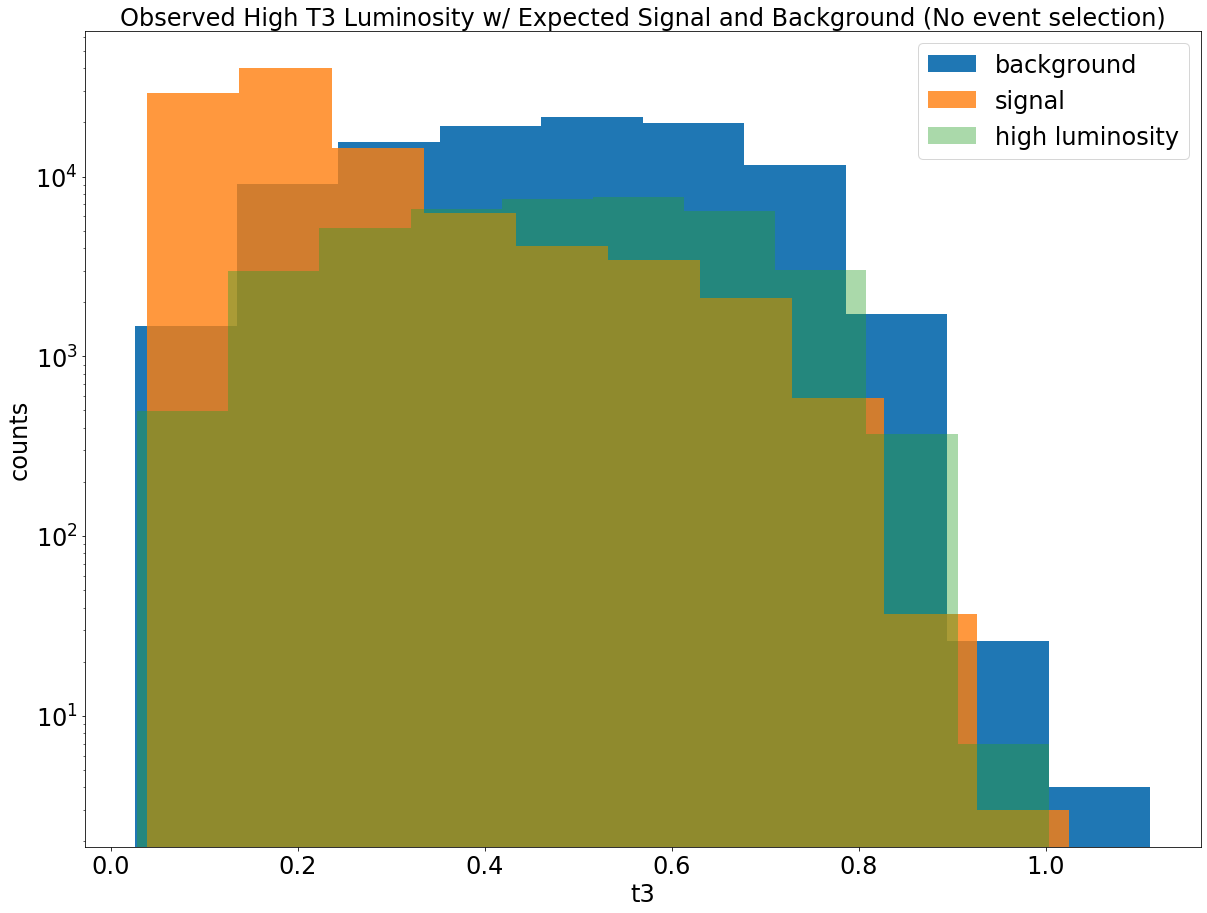

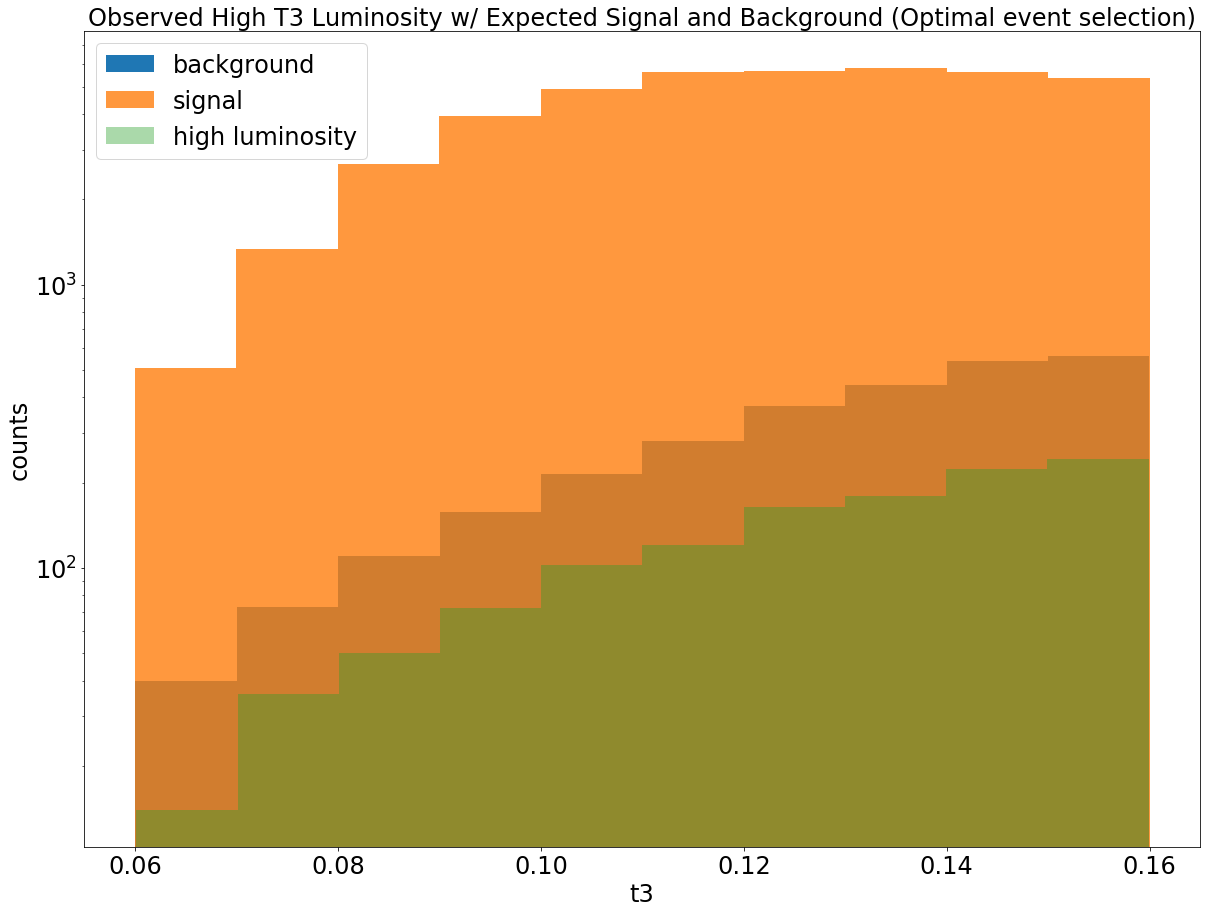

In [216]:
# t3

# no event selection
histo(bgt3, t3, hight3, "Observed High T3 Luminosity w/ Expected Signal and Background (No event selection)", "t3")

# optimal event selection
cutbg = find_nearest(s_bgt3, 0.16)
cutsig = find_nearest(s_t3, 0.16)
cuthigh = find_nearest(hight3, 0.16)

cutbg2 = find_nearest(s_bgt3, 0.06)
cutsig2 = find_nearest(s_t3, 0.06)
cuthigh2 = find_nearest(hight3, 0.06)

newbg = s_bgt3[cutbg2:cutbg]
newsig = s_t3[cutsig2:cutsig]
newhigh = hight3[cuthigh2:cuthigh]

histo(newbg, newsig, newhigh, "Observed High T3 Luminosity w/ Expected Signal and Background (Optimal event selection)", "t3")

# observed significance

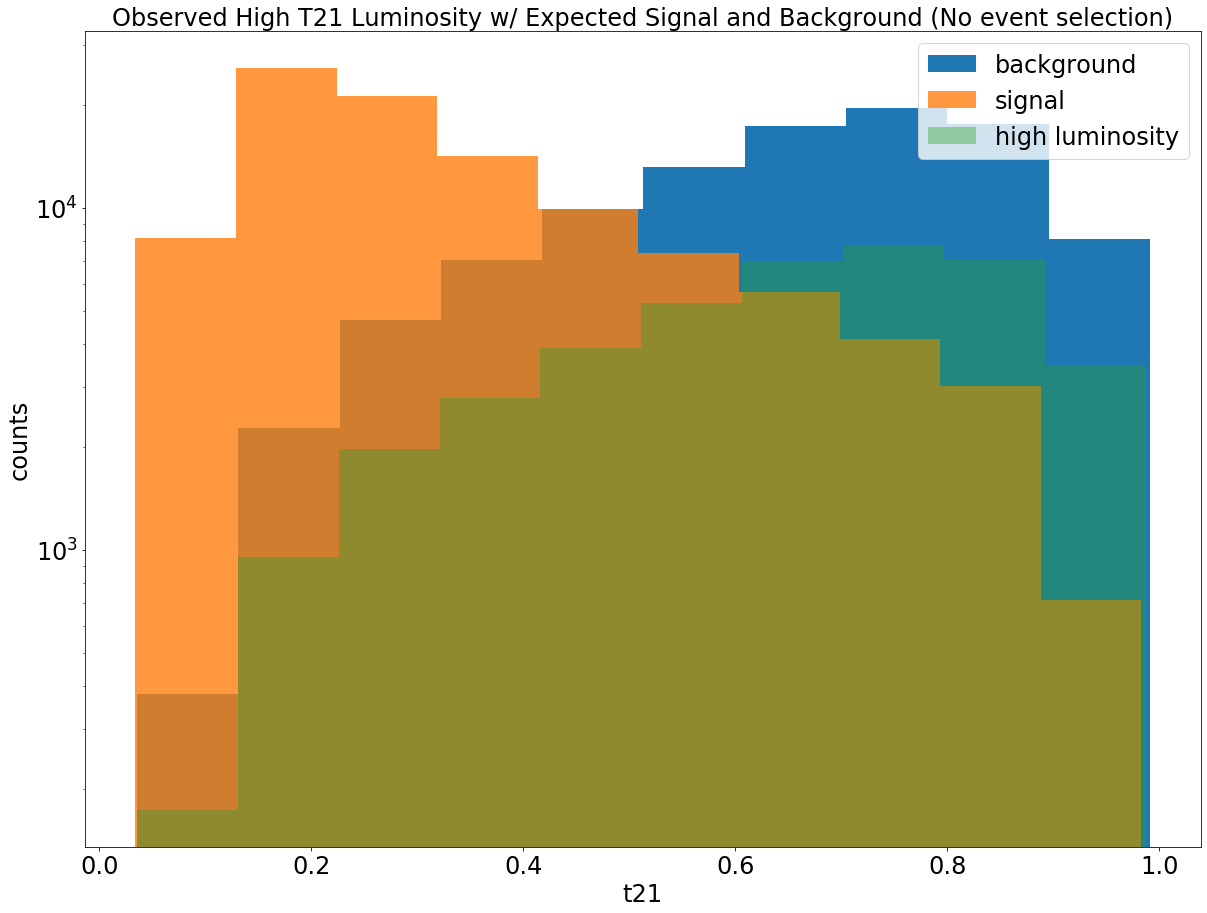

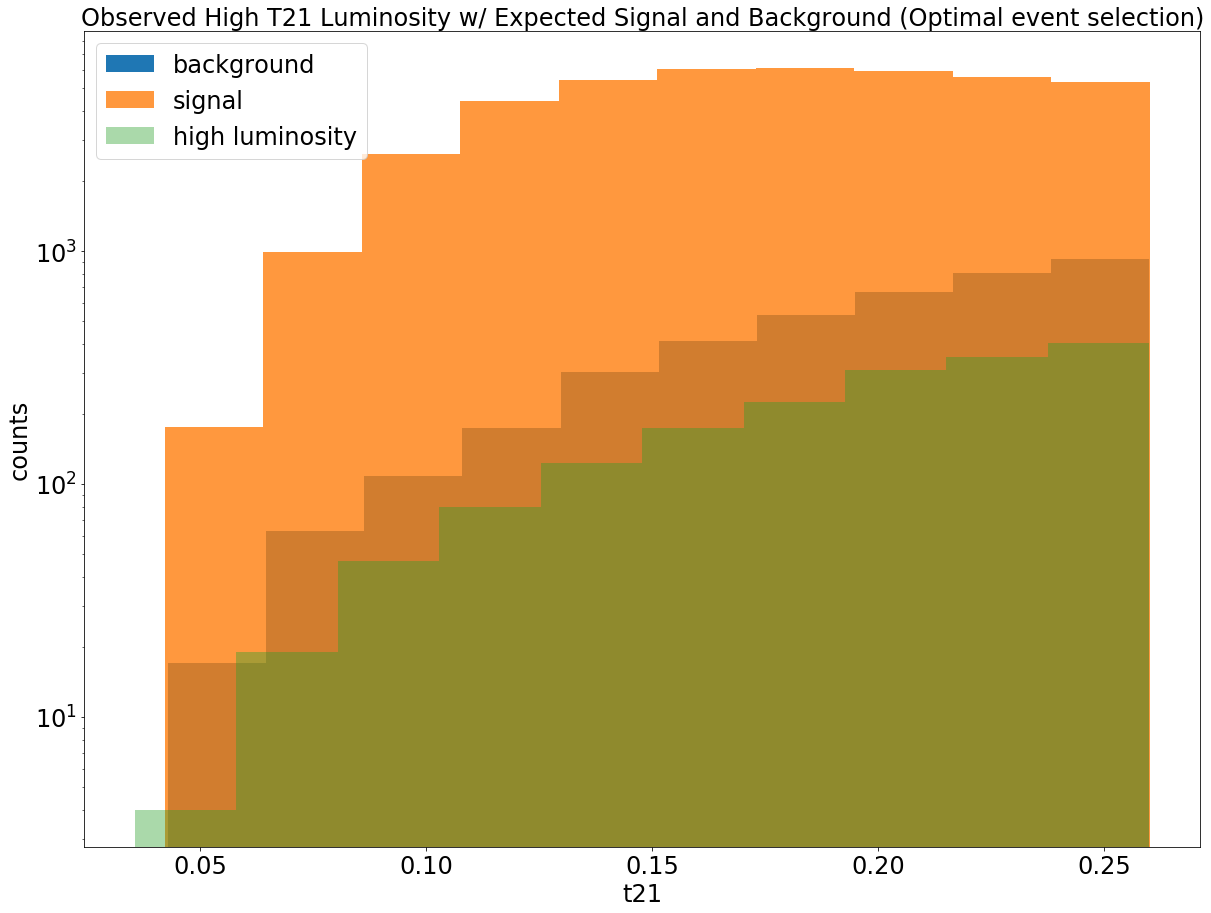

In [218]:
# t21

# no event selection
histo(bgt21, t21, hight21, "Observed High T21 Luminosity w/ Expected Signal and Background (No event selection)", "t21")

# optimal event selection
cutbg = find_nearest(s_bgt21, 0.26)
cutsig = find_nearest(s_t21, 0.26)
cuthigh = find_nearest(hight21, 0.26)

cutbg2 = find_nearest(s_bgt21, 0.04)
cutsig2 = find_nearest(s_t21, 0.04)
cuthigh2 = find_nearest(hight21, 0.04)

newbg = s_bgt21[cutbg2:cutbg]
newsig = s_t21[cutsig2:cutsig]
newhigh = hight21[cuthigh2:cuthigh]

histo(newbg, newsig, newhigh, "Observed High T21 Luminosity w/ Expected Signal and Background (Optimal event selection)", "t21")

# observed significance


In [187]:
signal = 100
qcd = 20000
highlumi = len(highmass)

# expected yield
exp_yield = signal / math.sqrt(qcd)
print("The expected yield:        ", exp_yield)

# observed significance
#prob = stats.poisson.cdf(, exp_yield * highlumi)

#sigma = stats.norm.ppf(prob)
#print("The observed significance:", sigma)

The expected yield:         0.7071067811865475


2)Low luminosity data
* Focus on each feature of your event selection.
* Plot observed data, overlap with expected signal and background (normalized to observed yields) without event selection.
* Plot observed data, overlap with expected signal and background (normalized to observed yields) with optimal event selection.
* Evaluate observed significance and compare your results to expectation

In [211]:
lowmass = sorted(low[:,3])
lowt3 = sorted(low[:,10])
lowt21 = sorted(low[:,11])

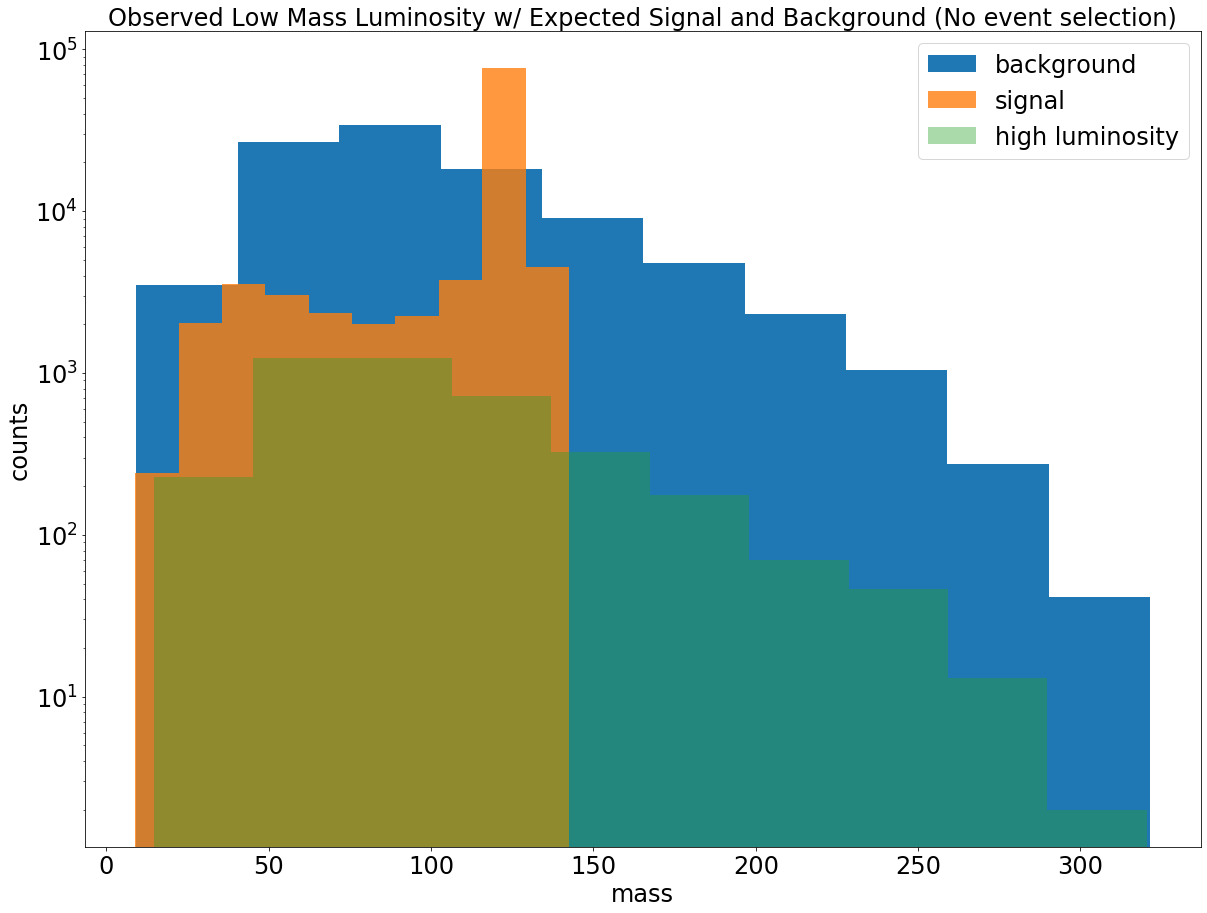

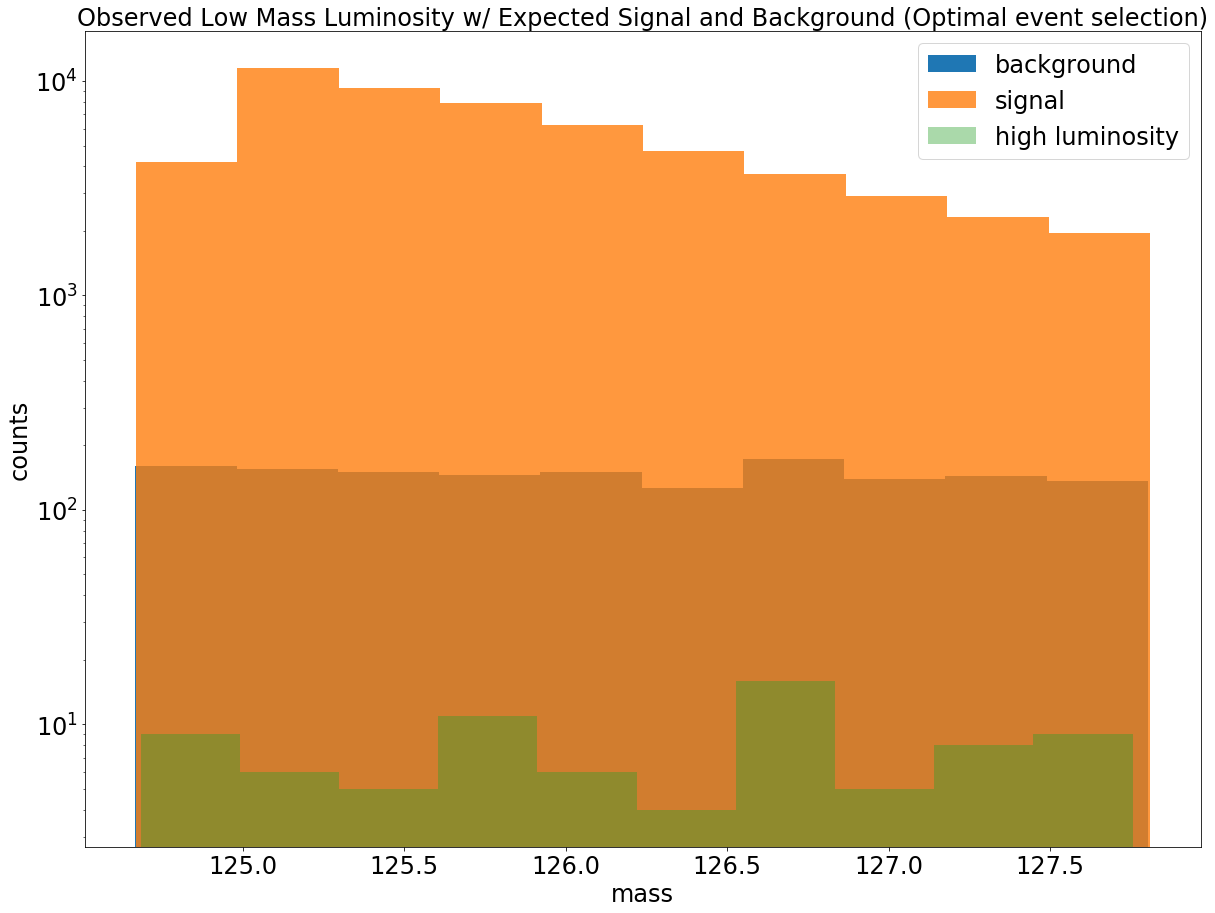

In [225]:
# MASS

# no event selection
histo(bgmass, mass, lowmass, "Observed Low Mass Luminosity w/ Expected Signal and Background (No event selection)", "mass")

# optimal event selection
cutbg = find_nearest(s_bgmass, 127.81)
cutsig = find_nearest(s_mass, 127.81)
cutlow = find_nearest(lowmass, 127.81)

cutbg2 = find_nearest(s_bgmass, 124.67)
cutsig2 = find_nearest(s_mass, 124.67)
cutlow2 = find_nearest(lowmass, 124.67)

newbg = s_bgmass[cutbg2:cutbg]
newsig = s_mass[cutsig2:cutsig]
newlow = lowmass[cutlow2:cutlow]

histo(newbg, newsig, newlow, "Observed Low Mass Luminosity w/ Expected Signal and Background (Optimal event selection)", "mass")

# observed significance

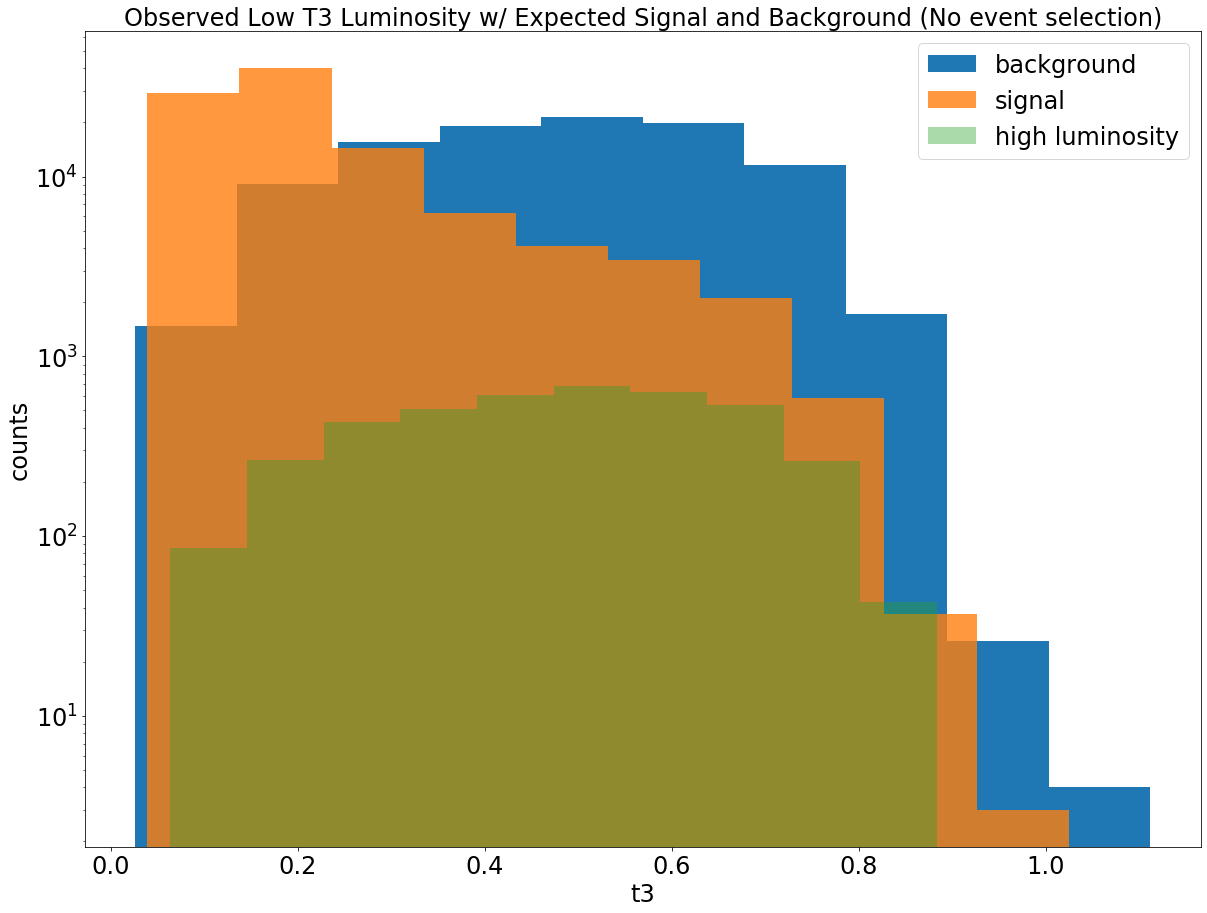

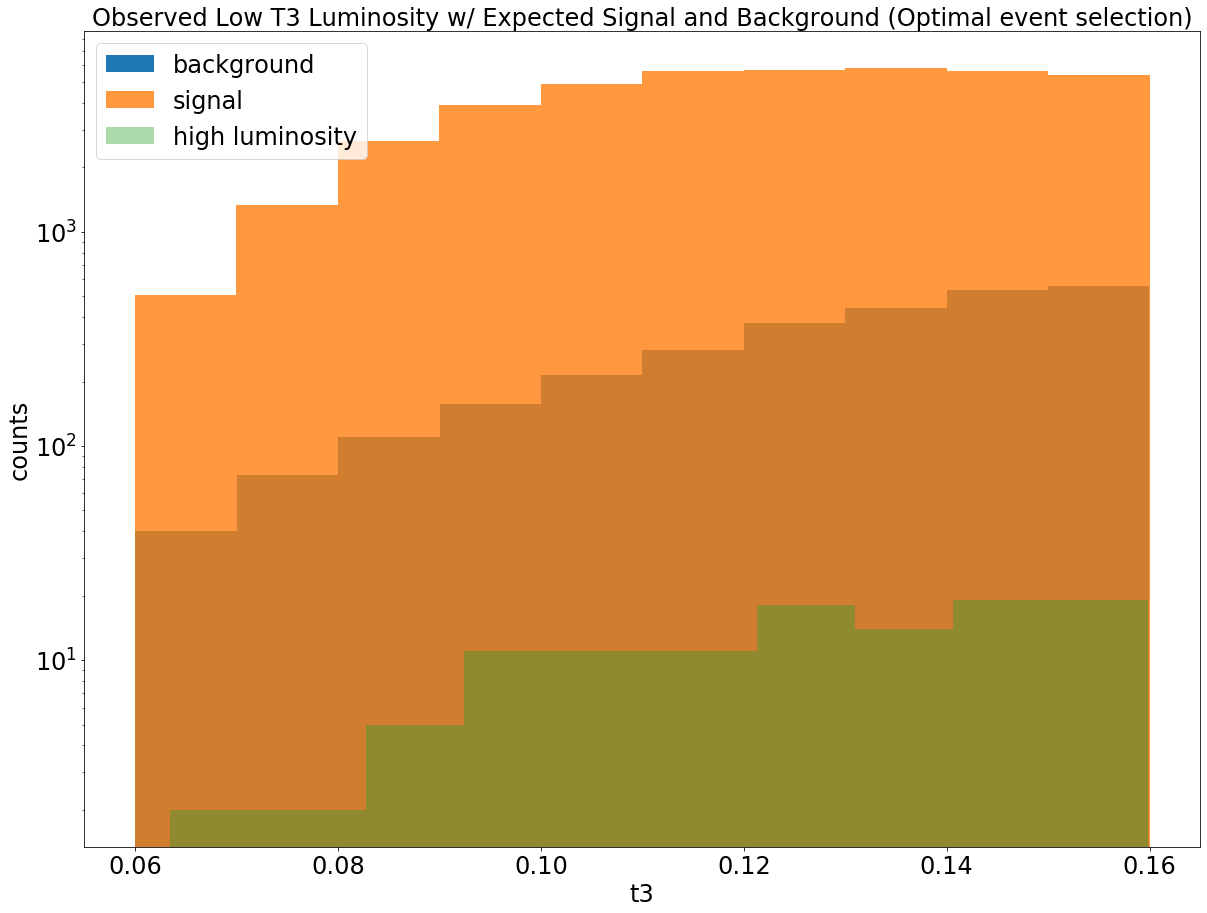

In [226]:
# t3

# no event selection
histo(bgt3, t3, lowt3, "Observed Low T3 Luminosity w/ Expected Signal and Background (No event selection)", "t3")

# optimal event selection
cutbg = find_nearest(s_bgt3, 0.16)
cutsig = find_nearest(s_t3, 0.16)
cutlow = find_nearest(lowt3, 0.16)

cutbg2 = find_nearest(s_bgt3, 0.06)
cutsig2 = find_nearest(s_t3, 0.06)
cutlow2 = find_nearest(lowt3, 0.06)

newbg = s_bgt3[cutbg2:cutbg]
newsig = s_t3[cutsig2:cutsig]
newlow = lowt3[cutlow2:cutlow]

histo(newbg, newsig, newlow, "Observed Low T3 Luminosity w/ Expected Signal and Background (Optimal event selection)", "t3")

# observed significance

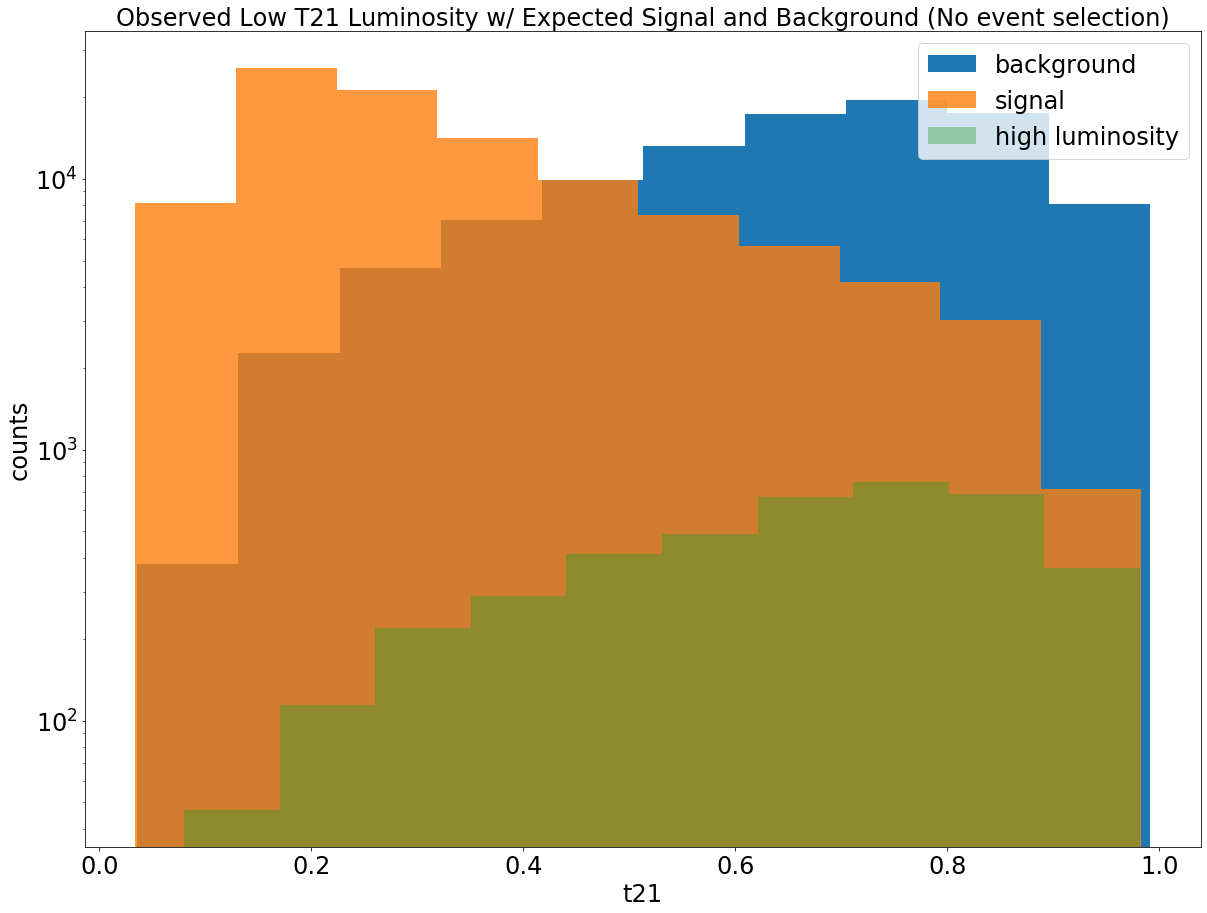

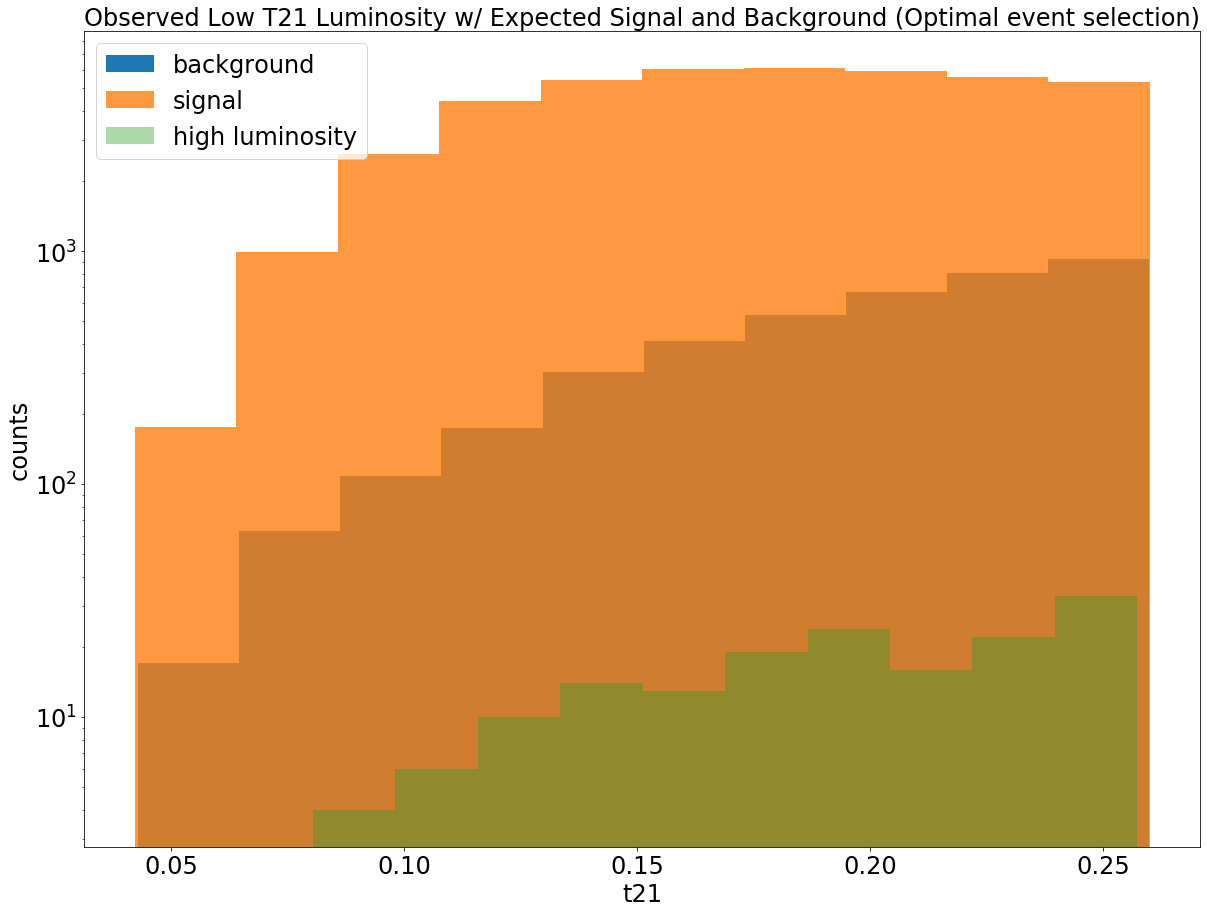

In [227]:
# t21

# no event selection
histo(bgt21, t21, lowt21, "Observed Low T21 Luminosity w/ Expected Signal and Background (No event selection)", "t21")

# optimal event selection
cutbg = find_nearest(s_bgt21, 0.26)
cutsig = find_nearest(s_t21, 0.26)
cutlow = find_nearest(lowt21, 0.26)

cutbg2 = find_nearest(s_bgt21, 0.04)
cutsig2 = find_nearest(s_t21, 0.04)
cutlow2 = find_nearest(lowt21, 0.04)

newbg = s_bgt21[cutbg2:cutbg]
newsig = s_t21[cutsig2:cutsig]
newlow = lowt21[cutlow2:cutlow]

histo(newbg, newsig, newlow, "Observed Low T21 Luminosity w/ Expected Signal and Background (Optimal event selection)", "t21")

# observed significance


3)95% Confidence Level of signal yields

* In the low luminosity data, the observed significance is less than 5 σ . We will calculate the 95% confidence level upper limit of signal yield.
* Evaluate the expected 95% confidence level upper limit
* Evaluate the observed 95% confidence level upper limit
* Compare expectation to observation. Comment on your finding.